Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple
import matplotlib

from brokenaxes import brokenaxes

# Formatting

Matplotlib parameters 

In [2]:
plt.rcParams.update({
    # Fonts - Times, 8-12 pt
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times"],
    "font.size": 12,                  # Base size 8-12 pt
    # Axes
    "axes.titlesize": 12,             # Axis title size
    "axes.labelsize": 12,             # Axis label size
    "axes.labelweight": "normal",     # Normal weight
    "axes.titleweight": "normal",     # Normal weight for titles
    # Ticks
    "xtick.labelsize": 9,             # X tick label size (8-12)
    "ytick.labelsize": 9,             # Y tick label size (8-12)
    "xtick.direction": "in",          # Tick direction
    "ytick.direction": "in",          # Tick direction
    # Legends
    "legend.fontsize": 12,            # Legend text size (8-12)
    "legend.title_fontsize": 12,      # Legend title size (8-12)
    "legend.loc": 'best',             # Automatic location
    # Resolution
    "figure.dpi": 500,                # Display DPI 
    "figure.dpi": 100,
    "savefig.dpi": 500,               # Save DPI (300-600)
    "savefig.bbox": "tight",          # Crop whitespace
    # Without LaTeX
    "text.usetex": False,             # PLOS does not accept LaTeX EPS
    "mathtext.fontset": "dejavuserif",# Match math fonts to serif
})

In [3]:
plt.rcParams.update({
    # Fonts - Times, 8-12 pt
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times"],
    "font.size": 12,                  # Base size 8-12 pt
    # Axes
    "axes.titlesize": 12,             # Axis title size
    "axes.labelsize": 12,             # Axis label size
    "axes.labelweight": "normal",     # Normal weight
    "axes.titleweight": "normal",     # Normal weight for titles
    # Ticks
    "xtick.labelsize": 9,             # X tick label size (8-12)
    "ytick.labelsize": 9,             # Y tick label size (8-12)
    "xtick.direction": "in",          # Tick direction
    "ytick.direction": "in",          # Tick direction
    # Legends
    "legend.fontsize": 12,            # Legend text size (8-12)
    "legend.title_fontsize": 12,      # Legend title size (8-12)
    "legend.loc": 'best',             # Automatic location
    # Resolution
    # "figure.dpi": 500,                # Display DPI  UNCOMMENT LATER. I commented it out now while I work on it, because Jupyter displayed pixel size = figsize * figure.dpi, causing huge images now in the notebook
    "figure.dpi": 100,
    "savefig.dpi": 500,               # Save DPI (300-600)
    "savefig.bbox": "tight",          # Crop whitespace
    # Without LaTeX
    "text.usetex": False,             # PLOS does not accept LaTeX EPS
    "mathtext.fontset": "dejavuserif",# Match math fonts to serif
})

Colors

In [4]:
## Reusable color utility
# I use this one
import numpy as np
import matplotlib.pyplot as plt

def make_color_map(values, cmap, vmin=0.25, vmax=1.0):
    '''
    Function that takes array of values and make a colormap for them
    '''
    values_sorted = sorted(values)
    colors = cmap(np.linspace(vmin, vmax, len(values)))
    return dict(zip(values_sorted, colors))

# To be given value
v_rest = [-22, -17, -12.3, -8.5]
pqif_vector = [0, 0.25, 0.5, 0.75, 1]

# Make colors once
color_map_vrest = make_color_map(v_rest, plt.cm.Reds)  # Reds for vrest
color_map_pqif = make_color_map(pqif_vector[1:-1], plt.cm.Greens)  # Greens for pqif

# Explicit endpoints for pqif
color_map_pqif[pqif_vector[0]] = 'black'
color_map_pqif[pqif_vector[-1]] = 'steelblue'


In [51]:
print(color_map_vrest)

{-22: array([0.98823529, 0.73207228, 0.62992695, 1.        ]), -17: array([0.98357555, 0.41279508, 0.28835063, 1.        ]), -12.3: array([0.79257209, 0.0932872 , 0.11298731, 1.        ]), -8.5: array([0.40392157, 0.        , 0.05098039, 1.        ])}


# Store values for plotting
Here I take out all the data I am interested in from the file system, and store it in a dedicated dataframe and dictionary. I make a dataframe with all values associated with a connectivity matrix and an ID, and a dictionary mapping ID to an array storing the weights (flattened). I do this so that I can loop through and plot everything from it in one go.

In [5]:
import pandas as pd
import numpy as np
import matplotlib
import sys


########## Loop variables ##########

vrest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74
all_slopes = [14.44, 10.68, 10.74, 8.65, 7.18]

pqif_number = [0, 0.25, 0.5, 0.75, 1]
pqif_homogenous = [0, 1]

dynamics = ['oscillations', 'sequences']
# dynamics = ['oscillations']
seed_number = [i for i in range(0, 2)] 


########## Dataframe and dictionary ##########

rows = []  # Container for rows of dataframe
weights_dict = {}  # Dictionary for weight arrays

for dyn in dynamics:

    # Simulation number corresponding to dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()

    for sim, vr, f in zip(simulation_number, vrest, slope):
        for pqif in pqif_number:
            for seed in seed_number:
                # Loop through simulations of pqif across seeds


                dataframe_title = f'{dyn}\simulation_{sim}\simulation_{sim}_connectivity_matrix\simulation_{sim}_connectivity_pqif_{pqif}_iloop_11_seed_{seed}' # load dataframe

                simulation_id = f'{dyn}_{sim}_{pqif}_{seed}'  # Shared across dataframe and dictionary

                try:  # Notify if something did not exist
                    weights_df = pd.read_csv(dataframe_title, header=None).values
                except FileNotFoundError:
                    print(f"File not found: {dataframe_title}, will be skipped.")
                    continue  # Go to next iteration


                # Flatten to 1D array
                weights = weights_df.flatten()

                # Standard deviation and mean of weights for current seed of vrest/slope and pqif
                sd = np.std(weights)
                mean = np.mean(weights)

                if pqif == 1:
                    vr = None
                    f = slope_qif


                row = [simulation_id, dyn, sim, vr, f, pqif, seed, sd, mean]  # Store all data associated with the connectivity matrix + a simulationID to the weights in dictionary
                rows.append(row)  # Append row to what becomes the dataframe later

                # weights_dict[simulation_id] = weights  # Dictionary mapping simulationID to weight array FLATTENED VERSION
                weights_dict[simulation_id] = weights_df  # Dictionary mapping simulationID to weight array


########## Make dataframe ##########

columns = ['simulationID', 'dynamic', 'simulation', 'vrest', 'slope', 'pqif', 'seed', 'std', 'mean']
df = pd.DataFrame(rows, columns=columns)


########## Make a copy of dataframe for further use ##########

wDF = df.copy()

########## Print statements to control ##########
print(wDF.head())
print(wDF.tail())
print(weights_dict)
# for i in weights_dict.items():
#     print(i)

            simulationID       dynamic  simulation  vrest  slope  pqif  seed  \
0     oscillations_1_0_0  oscillations           1   -8.5  14.44  0.00     0   
1     oscillations_1_0_1  oscillations           1   -8.5  14.44  0.00     1   
2  oscillations_1_0.25_0  oscillations           1   -8.5  14.44  0.25     0   
3  oscillations_1_0.25_1  oscillations           1   -8.5  14.44  0.25     1   
4   oscillations_1_0.5_0  oscillations           1   -8.5  14.44  0.50     0   

        std      mean  
0  0.227362  0.000569  
1  0.234936  0.000216  
2  0.239838 -0.000043  
3  0.246276  0.000383  
4  0.255670 -0.000032  
           simulationID    dynamic  simulation  vrest  slope  pqif  seed  \
75   sequences_12_0.5_1  sequences          12  -22.0   7.18  0.50     1   
76  sequences_12_0.75_0  sequences          12  -22.0   7.18  0.75     0   
77  sequences_12_0.75_1  sequences          12  -22.0   7.18  0.75     1   
78     sequences_12_1_0  sequences          12    NaN  10.74  1.00     

In [6]:
# pqif=1 have the same slope in each simulation and vrest=None

wDF_filtered1 = wDF[(wDF['seed'] == 1) & (wDF['pqif'] == 1)]

display(wDF_filtered1)

,simulationID,dynamic,simulation,vrest,slope,pqif,seed,std,mean
9,oscillations_1_1_1,oscillations,1,NaN,10.74,1.0,1,0.291823,0.000108
19,oscillations_2_1_1,oscillations,2,NaN,10.74,1.0,1,0.289862,0.000926
29,oscillations_3_1_1,oscillations,3,NaN,10.74,1.0,1,0.287589,0.000330
39,oscillations_4_1_1,oscillations,4,NaN,10.74,1.0,1,0.287338,0.000383
49,sequences_9_1_1,sequences,9,NaN,10.74,1.0,1,0.137212,0.022194
59,sequences_10_1_1,sequences,10,NaN,10.74,1.0,1,0.145482,0.021672
69,sequences_11_1_1,sequences,11,NaN,10.74,1.0,1,0.140025,0.021786
79,sequences_12_1_1,sequences,12,NaN,10.74,1.0,1,0.141470,0.021671


# Figures

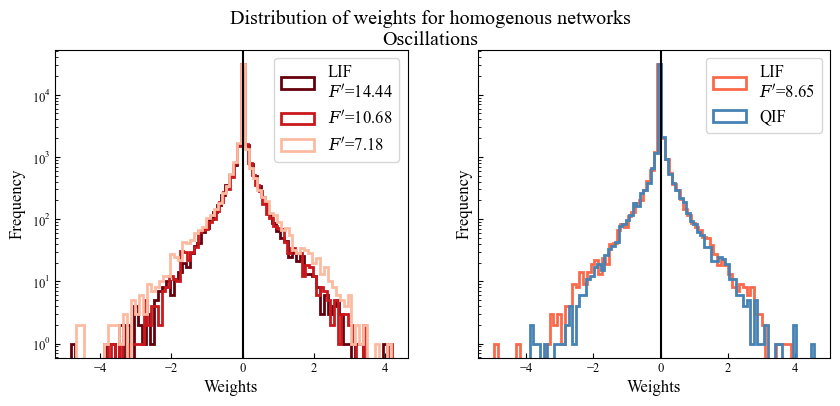

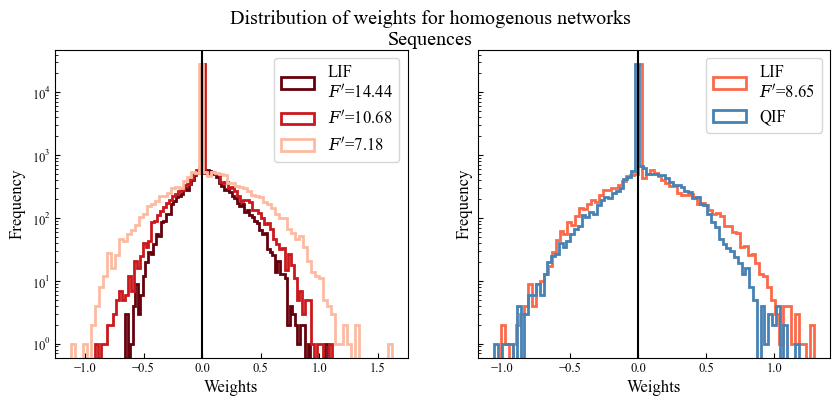

In [22]:
# ========== Histogram of weight distribution for homogenous networks ==========

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys


########## Loop variables ##########
vrest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = [10.74]
all_slopes = [14.44, 10.68, 10.74, 8.65, 7.18]

pqif_number = [0, 0.25, 0.5, 0.75, 1]
pqif_homogenous = [0, 1]

dynamics = ['oscillations', 'sequences']
# dynamics = ['oscillations']
seed_number = [i for i in range(0, 1)] # Only use one seed for this

########## Figure loop ##########
for dyn in dynamics:

    #### Correct simulaton numbers from dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()

    #### Create figure and axes

    fig, (ax1, ax2) = plt.subplots(
        nrows=1, ncols=2,
        figsize=(10,4),  # TODO review
        sharey=True
    )

    # ax_map = {
    #     'A': axes[0],
    #     'B': axes[1],
    # }

    for sim, vr, f in zip(simulation_number, vrest, slope):
        for pqif in pqif_homogenous:
            for seed in seed_number:

                #### Take out values to plot

                df_filtered = wDF[(wDF['dynamic'] == dyn) & (wDF['simulation'] == sim) & (wDF['pqif'] == pqif) & (wDF['seed'] == seed)]  # Current row of dataframe with metadata

                ID = df_filtered['simulationID'].item()  # Simulation ID

                current_weights = weights_dict[ID]  # Weight array (flattened)


                #### Color formatting

                if pqif == 1:
                    colors = 'steelblue'
                else:
                    colors = color_map_vrest[vr]


                #### Figure control flow

                if pqif == 0 and f in [14.44, 10.68, 7.18]:  # Left

                    if sim == simulation_number[0]:  # LIF header in legend
                        label = f"LIF\n$F'$={f}"
                    else:
                        label = f"$F'$={f}"

                    ax1.hist(current_weights, bins=80, log=True, color=colors, alpha=1, linewidth=2, histtype='step', label=label)
                    
                elif f == 8.65:  # Right
                    if pqif == 0:
                        label = f"LIF\n$F'$={f}"
                    else:
                        label = 'QIF'

                    ax2.hist(current_weights, bins=80, log=True, color=colors, alpha=1, linewidth=2, histtype='step', label=label)

                else:  # Ignore others
                    continue


    #### Shared formatting
    plt.suptitle(f"Distribution of weights for homogenous networks\n{dyn.capitalize()}")
    for ax in (ax1, ax2):
        ax.legend()
        ax.set_xlabel("Weights")
        ax.set_ylabel("Frequency")
        ax.axvline(0, color="black")
    plt.show()

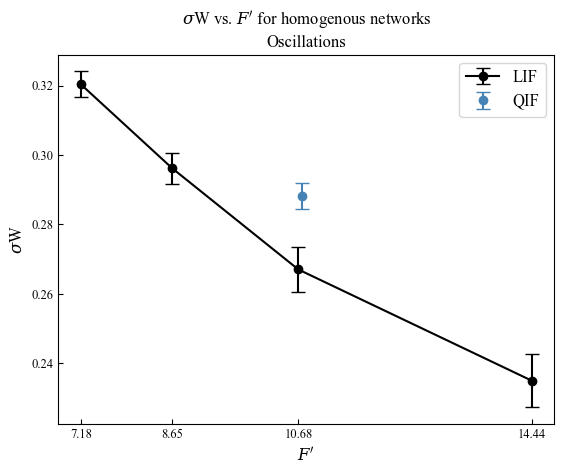

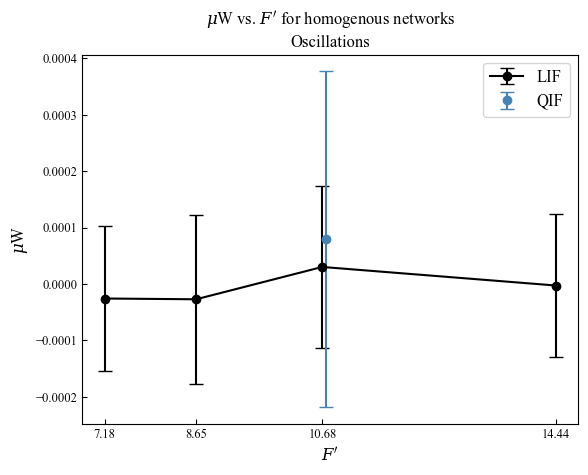

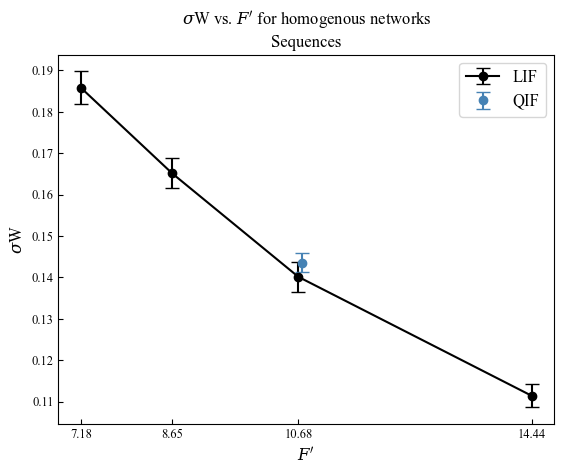

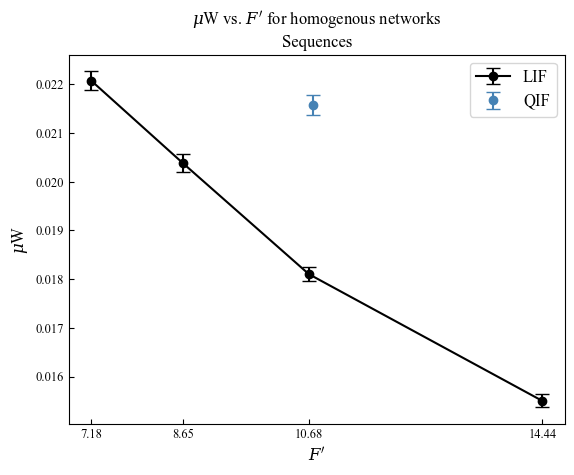

In [23]:
# ========== Standard deviation or Mean of weights vs. slope for homogenous networks ==========

import pandas as pd
import numpy as np
import matplotlib
import sys


########## Loop variables ##########
vrest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74
all_slopes = [14.44, 10.68, 10.74, 8.65, 7.18]

pqif_number = [0, 0.25, 0.5, 0.75, 1]
pqif_homogenous = [0, 1]

dynamics = ['oscillations', 'sequences']
# dynamics = ['oscillations']
seed_number = [i for i in range(0, 50)]

columns = ['std', 'mean']

x_ticks = [14.44, 10.68, 8.65, 7.18]

########## Figure loop ##########

for dyn in dynamics:

    #### Correct simulaton numbers from dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()

    #### Plot same figures for both STD and mean
    for c in columns:

        fig, ax = plt.subplots()


        for pqif in pqif_homogenous:

            y = []
            yerr = []
            x = slope


            for sim, vr, f in zip(simulation_number, vrest, slope):

                df_filtered = wDF[(wDF['dynamic'] == dyn) & (wDF['simulation'] == sim) & (wDF['pqif'] == pqif)]  # Current row of dataframe with metadata. Include all seeds since we want errorbars

                # Y: Mean of Y
                y_i = df_filtered[c].mean()

                # Y-error: STD of Y
                yerr_i = df_filtered[c].std()

                if pqif == 0: # For LIF: Make list across slope
                    y.append(y_i)
                    yerr.append(yerr_i)

                elif pqif == 1:  # Only one value for QIF since it is the same in each simulation
                    y = y_i
                    yerr = yerr_i

            colors = color_map_pqif[pqif]

            #### Title and labels depending on if STD or mean 

            if c == 'std':
                title = f"$\sigma$W vs. $F'$ for homogenous networks\n{dyn.capitalize()}"
                xlabel = f"$F'$"
                ylabel = f"$\sigma$W"

            elif c == "mean":
                title = f"$\mu$W vs. $F'$ for homogenous networks\n{dyn.capitalize()}"
                xlabel = f"$F'$"
                ylabel = f"$\mu$W"

            #### Plot values on ax

            if pqif == 0:
                label = 'LIF'
                ax.errorbar(x, y, yerr, fmt='o-', capsize=5, color=colors, label=label)

            elif pqif == 1:
                label = 'QIF'
                ax.errorbar(slope_qif, y, yerr, fmt='o', capsize=5, color=colors, label=label)

        ax.set_title(title)
        ax.set_xticks(x_ticks)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        plt.legend()
        plt.show()



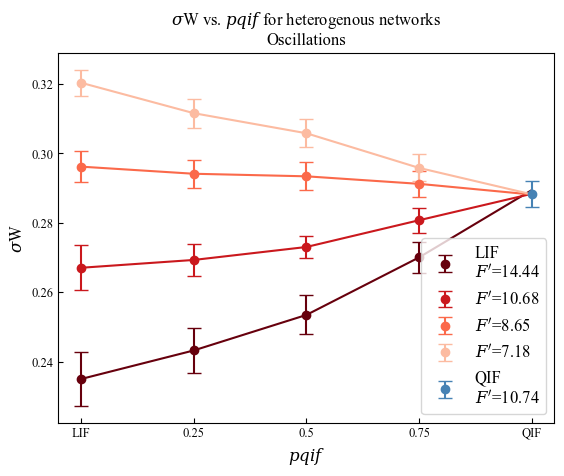

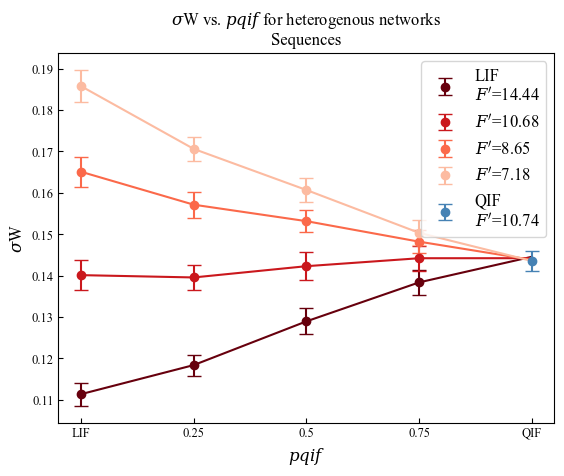

In [24]:
# ========== Standard deviation of weights vs. pqif for heterogenous networks ==========

import pandas as pd
import numpy as np
import matplotlib
import sys


########## Loop variables ##########
vrest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74
all_slopes = [14.44, 10.68, 10.74, 8.65, 7.18]

pqif_number = [0, 0.25, 0.5, 0.75, 1]
pqif_homogenous = [0, 1]

dynamics = ['oscillations', 'sequences']
# dynamics = ['oscillations']
seed_number = [i for i in range(0, 50)]

columns = ['std']

x_ticks = ['LIF', 0.25, 0.5, 0.75, 'QIF']

########## Figure loop ##########

for dyn in dynamics:

    #### Correct simulaton numbers from dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()

    #### Plot same figures for both STD and mean
    for c in columns:

        fig, ax = plt.subplots()


        for sim, vr, f in zip(simulation_number, vrest, slope):

            y = []
            yerr = []
            x = pqif_number

            for pqif in pqif_number:


                df_filtered = wDF[(wDF['dynamic'] == dyn) & (wDF['simulation'] == sim) & (wDF['pqif'] == pqif)]  # Current row of dataframe with metadata. Include all seeds since we want errorbars

                # Y: Mean of Y
                y_i = df_filtered[c].mean()

                # Y-error: STD of Y
                yerr_i = df_filtered[c].std()


                y.append(y_i)
                yerr.append(yerr_i)


            if (sim == simulation_number[0]):
                label = f"LIF\n$F'$={f}"
            else:
                label = f"$F'$={f}"

            
            ########## For formatting purposes, I plot double to allow connecting lines to QIF without having errorbars on top of eachother for QIF specifically ##########

            no_qif_x = x[:-1]
            no_qif_y = y[:-1]
            no_qif_yerr = yerr[:-1]

            ax.plot(x, y, linestyle='-', color=color_map_vrest[vr], label=None)
            ax.errorbar(no_qif_x, no_qif_y, no_qif_yerr, fmt='o', capsize=5, markersize=6, color=color_map_vrest[vr], label=label)

            # ax.errorbar(x, y, yerr, fmt='o-', capsize=5, color=color_map_vrest[vr], label=label)  # original

        
            ########## Title and tick labels ##########
            if c == 'std':
                title = f"$\sigma$W vs. $pqif$ for heterogenous networks\n{dyn.capitalize()}"
                xlabel = f"$pqif$"
                ylabel = f"$\sigma$W"

            elif c == "mean":
                title = f"$\mu$W vs. $pqif$ for heterogenous networks\n{dyn.capitalize()}"
                xlabel = f"$pqif$"
                ylabel = f"$\mu$W"


        ########## Add QIF ##########
        df_filtered_qif = wDF[(wDF['dynamic'] == dyn) & (wDF['simulation'] == sim) & (wDF['pqif'] == 1)]

        y_qif = df_filtered_qif[c].mean()  # y
        yerr_qif = df_filtered_qif[c].std()  # y-error
        x_qif = 1  # x

        ax.errorbar(x_qif, y_qif, yerr_qif, fmt='o', markersize=6, capsize=5, color='steelblue', label=f"QIF\n$F'$={slope_qif}")

        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_xticks(pqif_number, x_ticks)
        ax.set_ylabel(ylabel)
        plt.legend()
        plt.show()

    
    

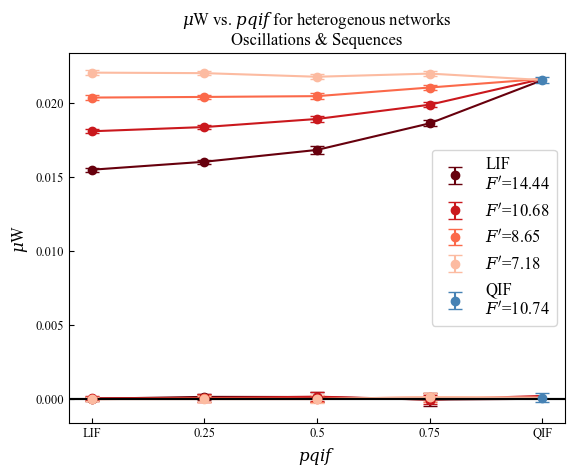

In [ ]:
# ========== Mean of weights vs. pqif for heterogenous networks ==========

import pandas as pd
import numpy as np
import matplotlib
import sys


########## Loop variables ##########
vrest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74
all_slopes = [14.44, 10.68, 10.74, 8.65, 7.18]

pqif_number = [0, 0.25, 0.5, 0.75, 1]
pqif_homogenous = [0, 1]

dynamics = ['oscillations', 'sequences']
# dynamics = ['oscillations']
seed_number = [i for i in range(0, 50)]

columns = ['mean']

x_ticks = ['LIF', 0.25, 0.5, 0.75, 'QIF']

########## Figure loop ##########

fig, ax = plt.subplots()  # Both dynamics should be in the same figure for this one

for dyn in dynamics:

    #### Correct simulaton numbers from dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()


    #### Plot same figures for both STD and mean
    for c in columns:



        for sim, vr, f in zip(simulation_number, vrest, slope):

            y = []
            yerr = []
            x = pqif_number

            for pqif in pqif_number:


                df_filtered = wDF[(wDF['dynamic'] == dyn) & (wDF['simulation'] == sim) & (wDF['pqif'] == pqif)]  # Current row of dataframe with metadata. Include all seeds since we want errorbars

                # Y: Mean of Y
                y_i = df_filtered[c].mean()

                # Y-error: STD of Y
                yerr_i = df_filtered[c].std()


                y.append(y_i)
                yerr.append(yerr_i)


            if (sim == simulation_number[0]):
                label = f"LIF\n$F'$={f}"
            else:
                label = f"$F'$={f}"

            if dyn == 'sequences':
                label = None


            ########## For formatting purposes, I plot double to allow connecting lines to QIF without having errorbars on top of eachother for QIF specifically ##########

            no_qif_x = x[:-1]
            no_qif_y = y[:-1]
            no_qif_yerr = yerr[:-1]


            # ax.errorbar(x, y, yerr, fmt='o', capsize=5, color=color_map_vrest[vr], label=label)
            ax.errorbar(no_qif_x, no_qif_y, no_qif_yerr, fmt='o', capsize=5, color=color_map_vrest[vr], label=label)
            ax.plot(x, y, linestyle='-', color=color_map_vrest[vr], label=None)

        
        ########## Title and tick labels ##########
        if c == 'std':
            title = f"$\sigma$W vs. $pqif$ for heterogenous networks\n{dyn.capitalize()}"
            xlabel = f"$pqif$"
            ylabel = f"$\sigma$W"

        elif c == "mean":
            title = f"$\mu$W vs. $pqif$ for heterogenous networks\nOscillations & Sequences"
            xlabel = f"$pqif$"
            ylabel = f"$\mu$W"


        ########## Add QIF ##########
        df_filtered_qif = wDF[(wDF['dynamic'] == dyn) & (wDF['simulation'] == sim) & (wDF['pqif'] == 1)]

        y_qif = df_filtered_qif[c].mean()  # y
        yerr_qif = df_filtered_qif[c].std()  # y-error
        x_qif = 1  # x

        if dyn == 'oscillations': # first
            label = f"QIF\n$F'$={slope_qif}"
        else:
            label = None


        ax.errorbar(x_qif, y_qif, yerr_qif, fmt='o', capsize=5, color='steelblue', label=label)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_xticks(pqif_number, x_ticks)
    ax.set_ylabel(ylabel)
    ax.axhline(0, color='black')


plt.legend()
# plt.show()

    
    


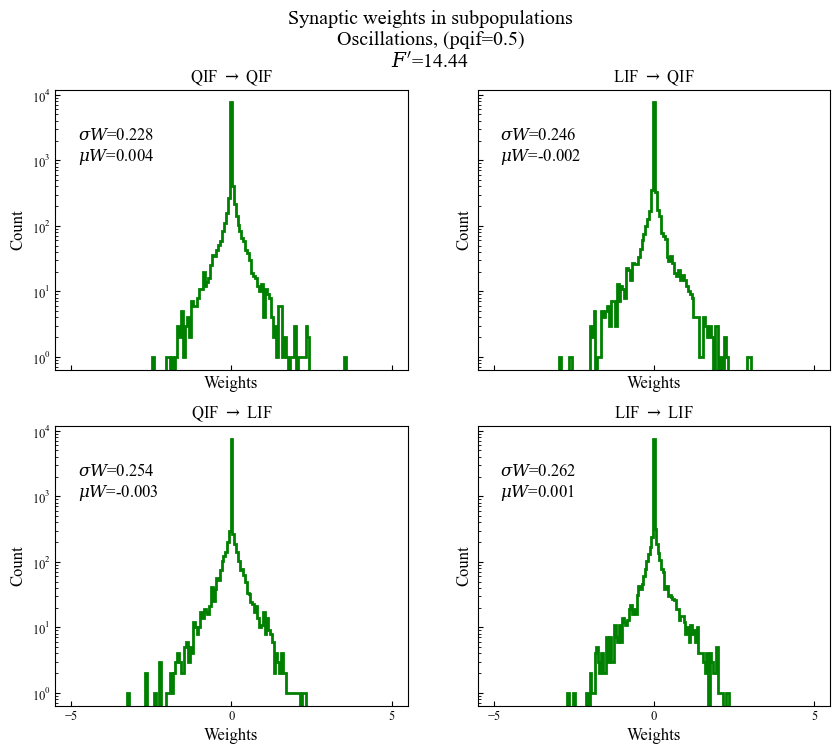

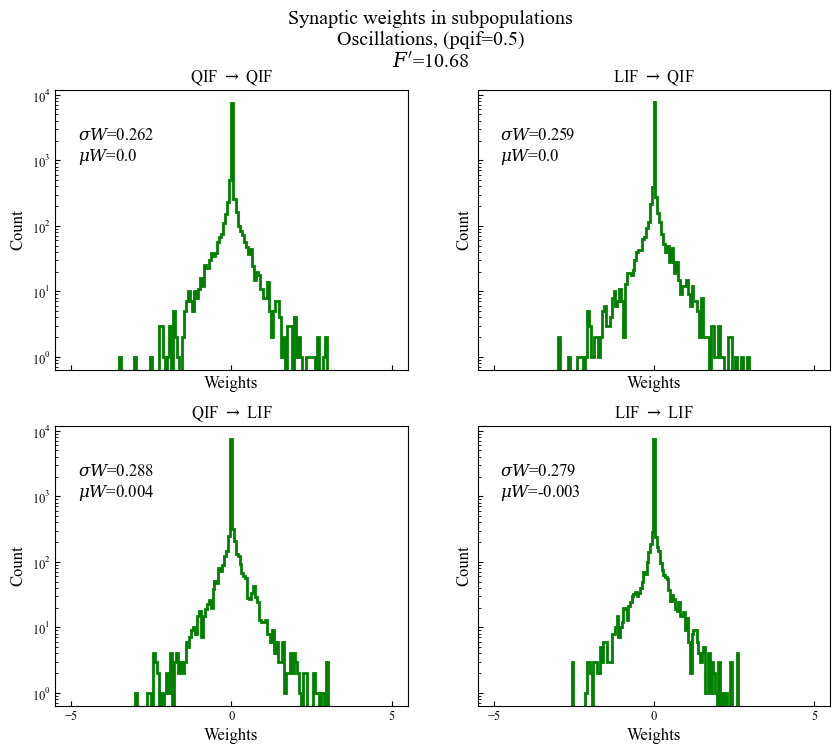

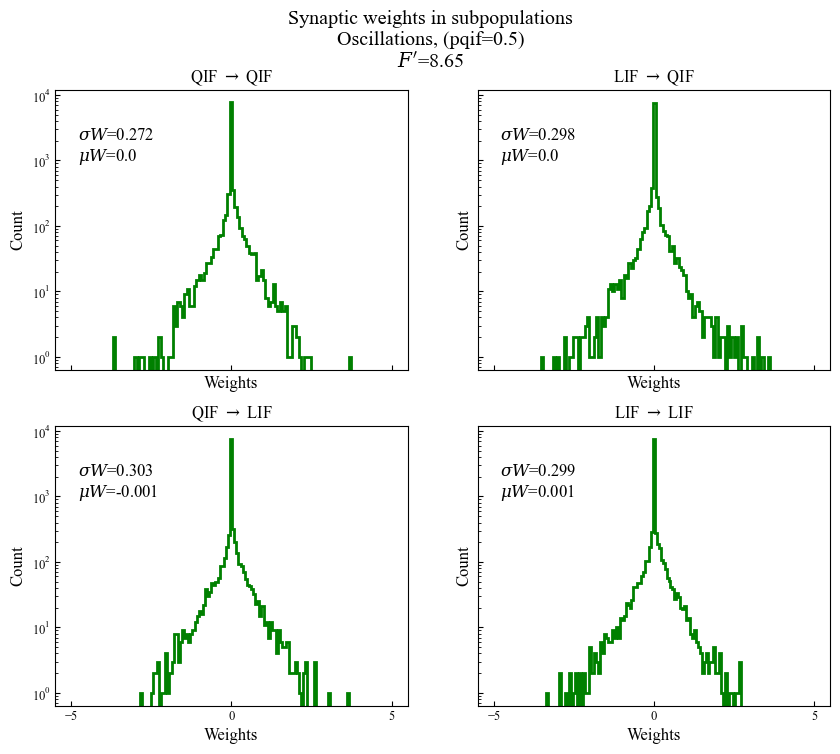

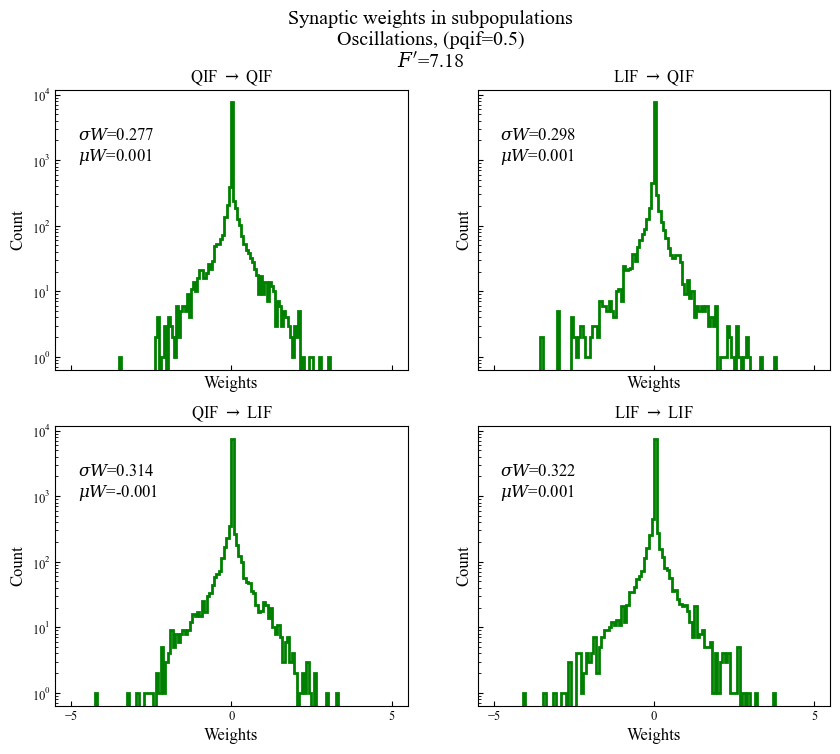

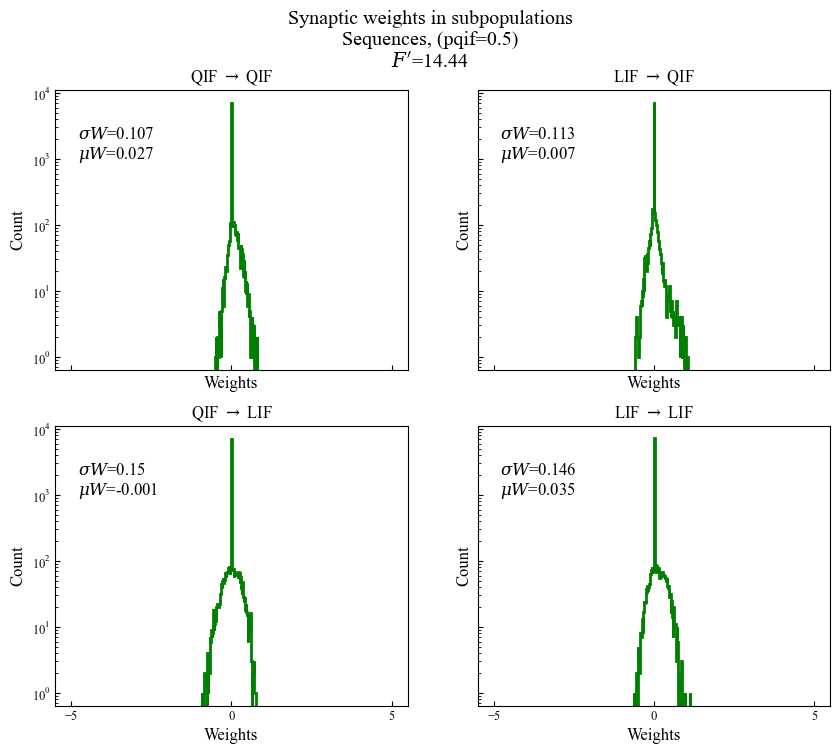

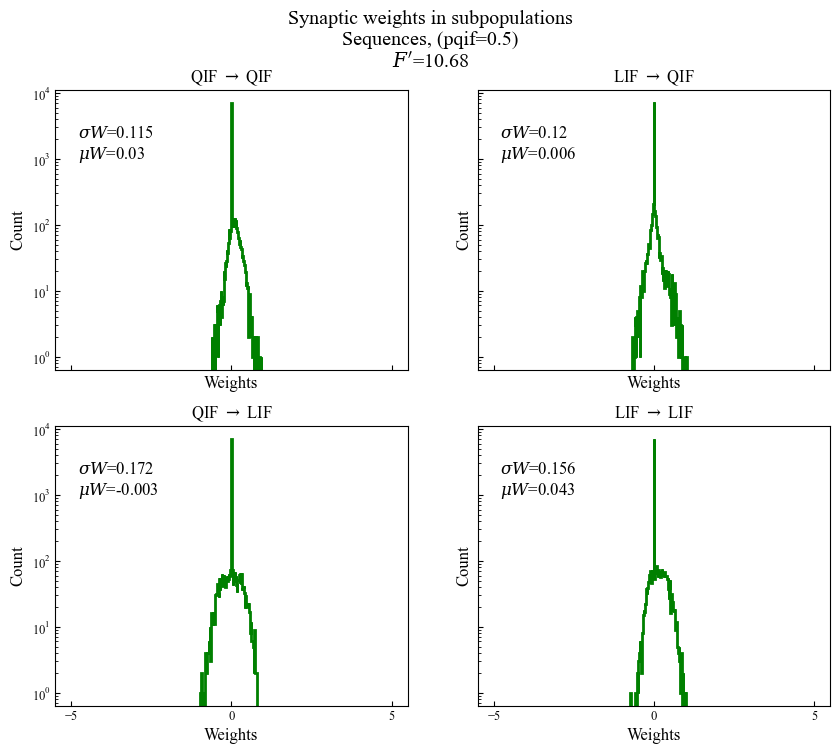

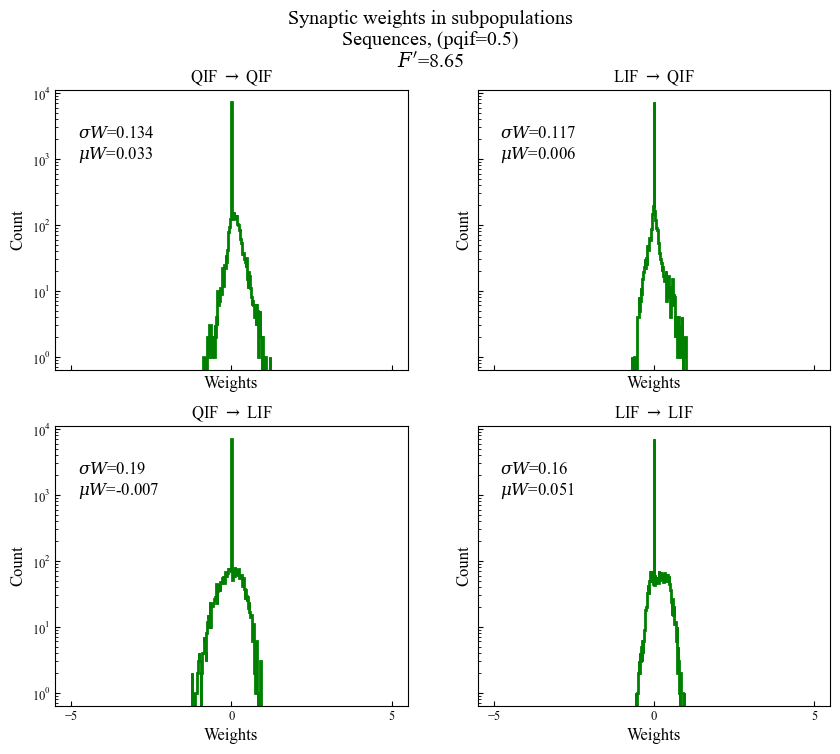

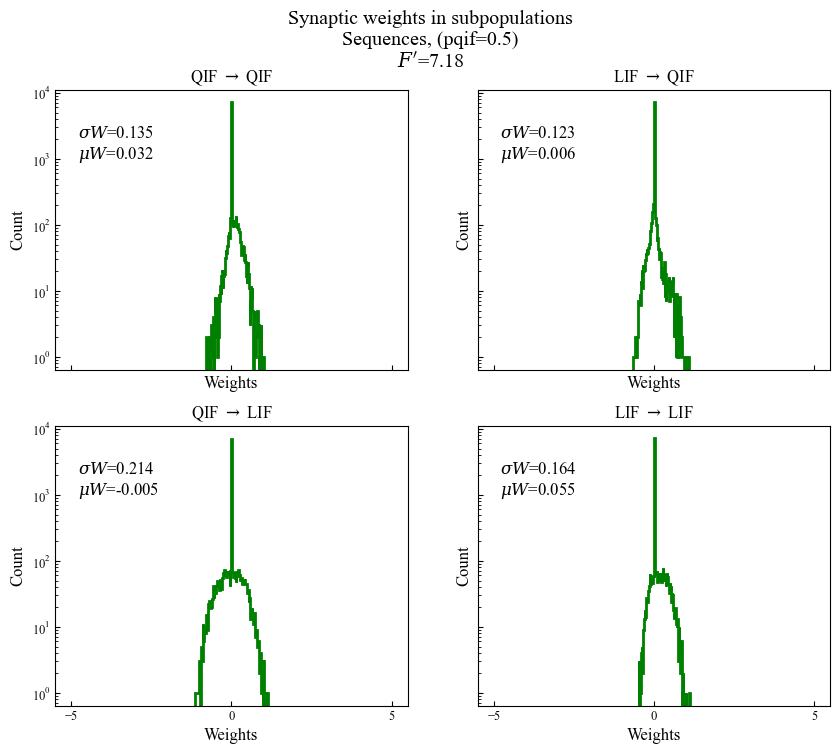

In [57]:
# ========== Breakdown of subpopulations ==========

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

########## Loop variables ##########
# simulation_number = [1, 2, 3, 4]

vrest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74
all_slopes = [14.44, 10.68, 10.74, 8.65, 7.18]

# pqif_number = [0, 0.25, 0.5, 0.75, 1]
pqif_number = [0.5]
pqif_homogenous = [0, 1]

dynamics = ['oscillations', 'sequences']
# dynamics = ['oscillations']
seed_number = [i for i in range(0, 1)]

columns = ['mean']

x_ticks = ['LIF', 0.25, 0.5, 0.75, 'QIF']


for dyn in dynamics:

    # Simulation number corresponding to dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()

    for sim, vr, f in zip(simulation_number, vrest, slope):

        fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)  # TODO review

        for pqif in pqif_number:
            for seed in seed_number:
                # Loop through simulations of pqif across seeds

                fig.suptitle(f"Synaptic weights in subpopulations\n{dyn.capitalize()}, (pqif={pqif})\n$F'$={f}")

                dataframe_title = f'{dyn}\simulation_{sim}\simulation_{sim}_connectivity_matrix\simulation_{sim}_connectivity_pqif_{pqif}_iloop_11_seed_{seed}' # load dataframe

                simulation_id = f'{dyn}_{sim}_{pqif}_{seed}'  # Shared across dataframe and dictionary

                try:  # Notify if something did not exist
                    weights_df = pd.read_csv(dataframe_title, header=None)
                except FileNotFoundError:
                    print(f"File not found: {dataframe_title}, will be skipped.")
                    continue  # Go to next iteration

                r, c = weights_df.shape  # rows, columns

                
                if r % 2 != 0 or c % 2 != 0:  # check if even
                    sys.exit(f"Error: Matrix has odd dimensions ({r} x {c}), cannot split evenly.")

                r_mid = r // 2  # Find middle of rows
                c_mid = c // 2  # Find middle of columns

                q1 = weights_df.iloc[:r_mid, :c_mid].copy()  # qif-->qif
                q2 = weights_df.iloc[:r_mid, c_mid:].copy()  # lif-->qif
                q3 = weights_df.iloc[r_mid:, :c_mid].copy()  # qif-->lif
                q4 = weights_df.iloc[r_mid:, c_mid:].copy()  # lif --> lif

                list_of_quadrants = [q1, q2, q3, q4]

                list_of_titles = [(rf"QIF $\rightarrow$ QIF"), (rf"LIF $\rightarrow$ QIF"), (rf"QIF $\rightarrow$ LIF"), (rf"LIF $\rightarrow$ LIF")]

        axs_flat = axs.flat

        for i, (q, title) in enumerate(zip(list_of_quadrants, list_of_titles)):
            ax = axs_flat[i]
            # ax = axs
            data = q.values.flatten()  # take out values and flatten into 1D

            sd = np.std(data)
            sd_rounded = np.round(sd, decimals=3)
            mean = np.mean(data)
            mean_rounded = np.round(mean, decimals=3)

            ticks = [-5, 0, 5]

            ax.hist(data, bins=100, log=True, histtype='step', linewidth=2, color='green')
            ax.set_title(title)
            ax.text(-4.8, 10**3, f"$\sigma$$W$={sd_rounded}\n$\mu$$W$={mean_rounded}")
            ax.set_xlabel('Weights')
            ax.set_xlim(-5.5, 5.5)
            ax.set_xticks(ticks)
            ax.set_ylabel('Count')
        plt.show()



In [ ]:
########## New version

# ========== Quantification of breakdown between subpopulations ==========

import pandas as pd
import numpy as np
import matplotlib
import sys


########## Loop variables ##########
vrest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74
all_slopes = [14.44, 10.68, 10.74, 8.65, 7.18]

pqif_number = [0, 0.25, 0.5, 0.75, 1]
pqif_homogenous = [0, 1]
pqif_heterogenous = [0.25, 0.5, 0.75]

dynamics = ['oscillations', 'sequences']
# dynamics = ['oscillations']
seed_number = [i for i in range(0, 2)]


########## Figure variables ##########
x = [1, 2, 3, 4]  # q1...q4
x_ticks = [(rf"QIF $\rightarrow$ QIF"), (rf"LIF $\rightarrow$ QIF"), (rf"QIF $\rightarrow$ LIF"), (rf"LIF $\rightarrow$ LIF")]


########## Make dataframe with necessary valyes ##########

rows = []  # Will be a dataframe with all values needed

for dyn in dynamics:

    #### Correct simulaton numbers from dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()


    # row = []
    for pqif in pqif_heterogenous:

        # fig, ax = plt.subplots()


        for sim, vr, f in zip(simulation_number, vrest, slope):

            # y = []
            # yerr = []
            # x = x

            for seed in seed_number:


                ## Access total weight matrix
                df = pd.read_csv(f'{dyn}\simulation_{sim}\simulation_{sim}_connectivity_matrix\simulation_{sim}_connectivity_pqif_{pqif}_iloop_11_seed_{seed}', header=None)

                ## Total rows, columns
                r, c = df.shape  # rows, columns (type: int)

                ## Find cut
                r_cut = int(r * pqif)  # first pqif_num rows are QIF
                c_cut = int(c * pqif)  # first pqif_num columns are QIF


                ## Make quadrants based on cut
                # (Row, column start with QIF up to pqif)
                # Columns are presynaptic, rows are postsynaptic
                q1 = df.iloc[:r_cut, :c_cut].copy()  # qif-->qif
                q2 = df.iloc[:r_cut, c_cut:].copy()  # lif-->qif   
                q3 = df.iloc[r_cut:, :c_cut].copy()  # qif-->lif
                q4 = df.iloc[r_cut:, c_cut:].copy()  # lif --> lif

                
                list_of_quadrants = [q1, q2, q3, q4]
                names = [f"q{i}" for i in range(1, len(list_of_quadrants) +1)]
                # print(names)

                


                for q, nm in zip(list_of_quadrants, names):
                    # One row
                    q_flattened = q.values.flatten()  # Take out values of quadrant, and flatten into 1D
                    name = nm
                    mean = np.mean(q_flattened)
                    sd = np.std(q_flattened)
                    shape = q.shape

                    row = [dyn, pqif, seed, sim, vr, f, name, shape, mean, sd]
                    rows.append(row)


columns = ['dyn', 'pqif', 'seed', 'sim', 'vr', 'f', 'quadrant', 'shape', 'mean', 'sd']
df_stats = pd.DataFrame(rows, columns=columns)
q_stats = df_stats.copy() # This copy now contains all values needed to plot these types of figures
display(q_stats)


########## Figure plotting ##########


,dyn,pqif,seed,sim,vr,f,quadrant,shape,mean,sd
0,oscillations,0.25,0,1,-8.5,14.44,q1,"(50, 50)",0.009582,0.269830
1,oscillations,0.25,0,1,-8.5,14.44,q2,"(50, 150)",-0.002763,0.271055
2,oscillations,0.25,0,1,-8.5,14.44,q3,"(150, 50)",0.002895,0.259967
3,oscillations,0.25,0,1,-8.5,14.44,q4,"(150, 150)",-0.000526,0.240769
4,oscillations,0.25,1,1,-8.5,14.44,q1,"(50, 50)",-0.009294,0.254104
...,...,...,...,...,...,...,...,...,...,...
4795,sequences,0.75,48,12,-22.0,7.18,q4,"(50, 50)",0.077444,0.152695
4796,sequences,0.75,49,12,-22.0,7.18,q1,"(150, 150)",0.020964,0.144882
4797,sequences,0.75,49,12,-22.0,7.18,q2,"(150, 50)",0.031639,0.113308
4798,sequences,0.75,49,12,-22.0,7.18,q3,"(50, 150)",-0.004415,0.188506


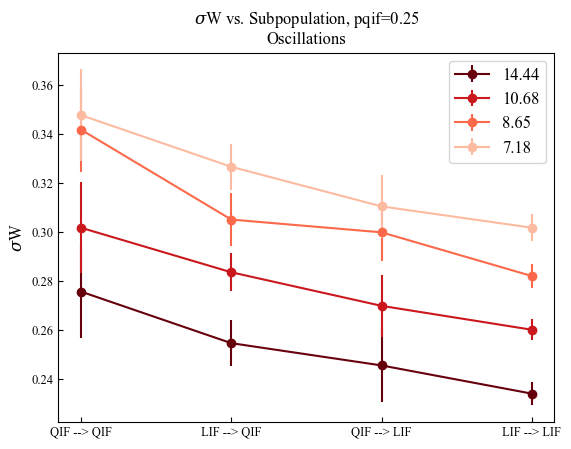

[array([(50, 50)], dtype=object), array([(50, 150)], dtype=object), array([(150, 50)], dtype=object), array([(150, 150)], dtype=object)]


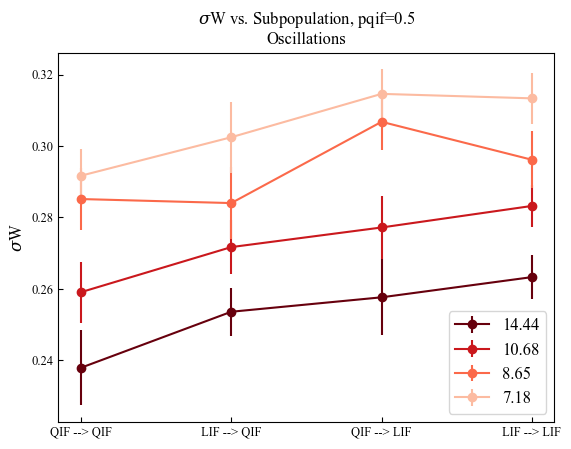

[array([(100, 100)], dtype=object), array([(100, 100)], dtype=object), array([(100, 100)], dtype=object), array([(100, 100)], dtype=object)]


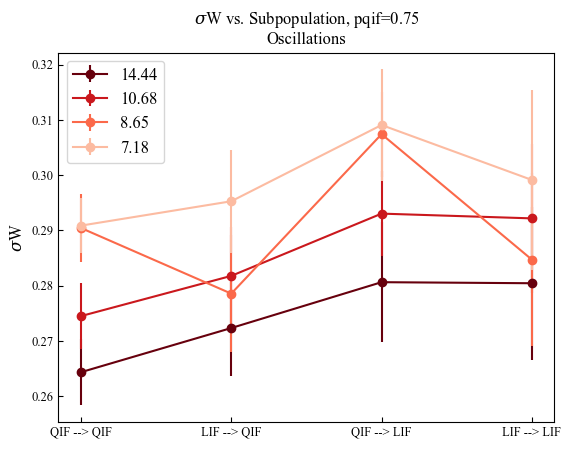

[array([(150, 150)], dtype=object), array([(150, 50)], dtype=object), array([(50, 150)], dtype=object), array([(50, 50)], dtype=object)]


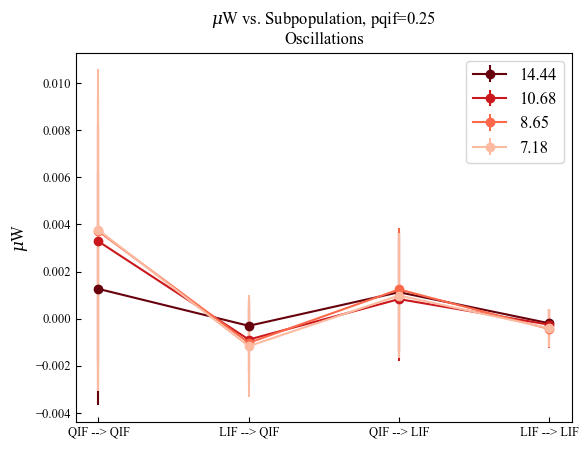

[array([(50, 50)], dtype=object), array([(50, 150)], dtype=object), array([(150, 50)], dtype=object), array([(150, 150)], dtype=object)]


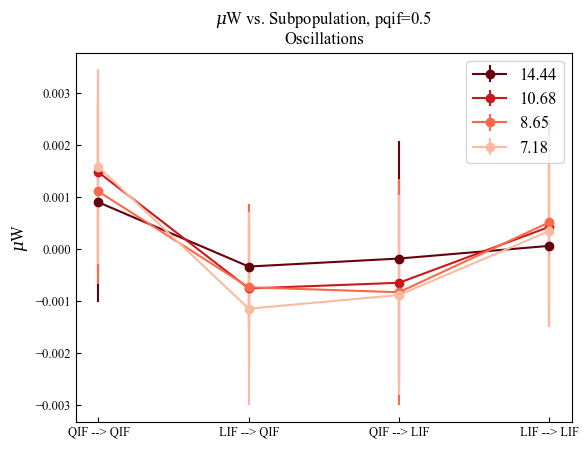

[array([(100, 100)], dtype=object), array([(100, 100)], dtype=object), array([(100, 100)], dtype=object), array([(100, 100)], dtype=object)]


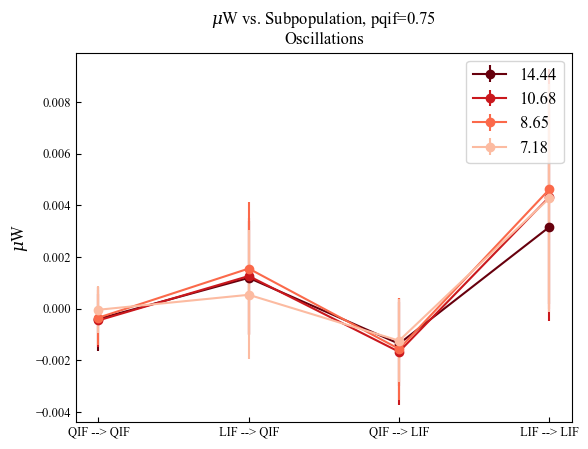

[array([(150, 150)], dtype=object), array([(150, 50)], dtype=object), array([(50, 150)], dtype=object), array([(50, 50)], dtype=object)]


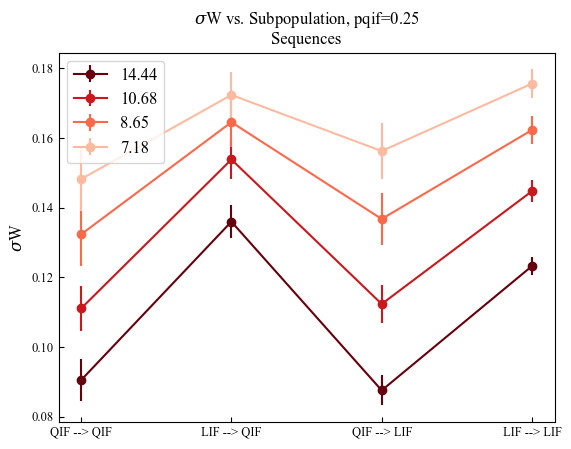

[array([(50, 50)], dtype=object), array([(50, 150)], dtype=object), array([(150, 50)], dtype=object), array([(150, 150)], dtype=object)]


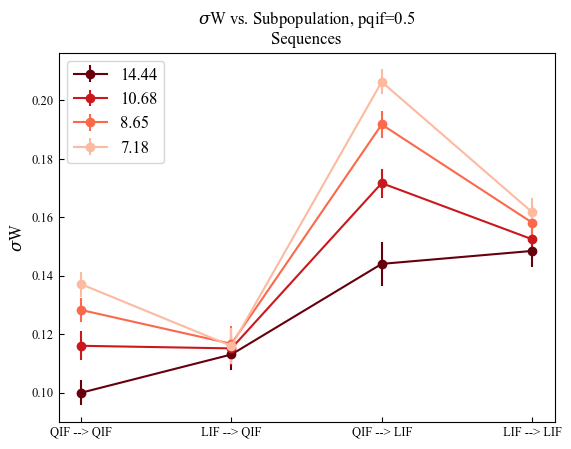

[array([(100, 100)], dtype=object), array([(100, 100)], dtype=object), array([(100, 100)], dtype=object), array([(100, 100)], dtype=object)]


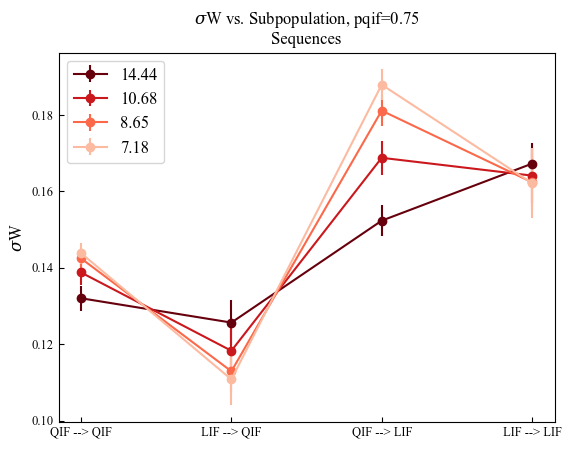

[array([(150, 150)], dtype=object), array([(150, 50)], dtype=object), array([(50, 150)], dtype=object), array([(50, 50)], dtype=object)]


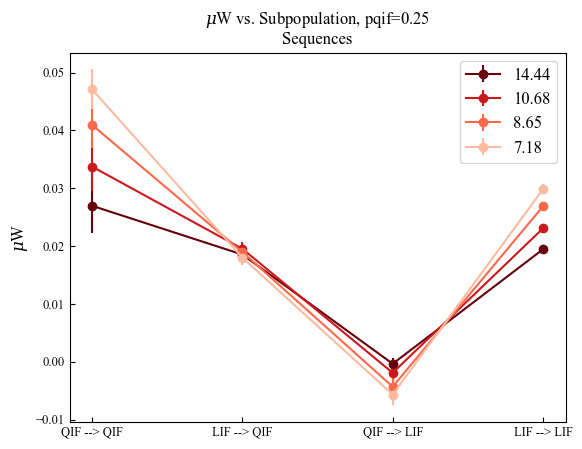

[array([(50, 50)], dtype=object), array([(50, 150)], dtype=object), array([(150, 50)], dtype=object), array([(150, 150)], dtype=object)]


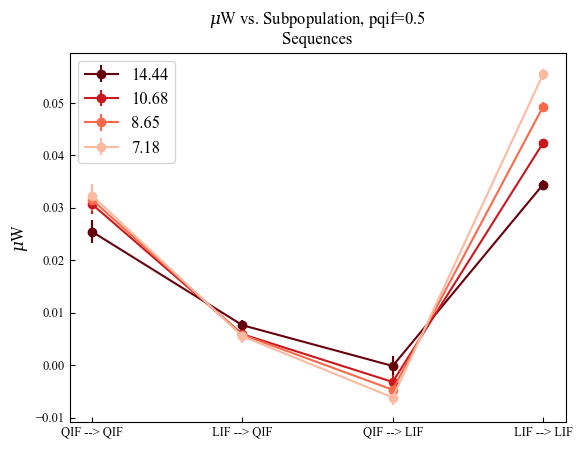

[array([(100, 100)], dtype=object), array([(100, 100)], dtype=object), array([(100, 100)], dtype=object), array([(100, 100)], dtype=object)]


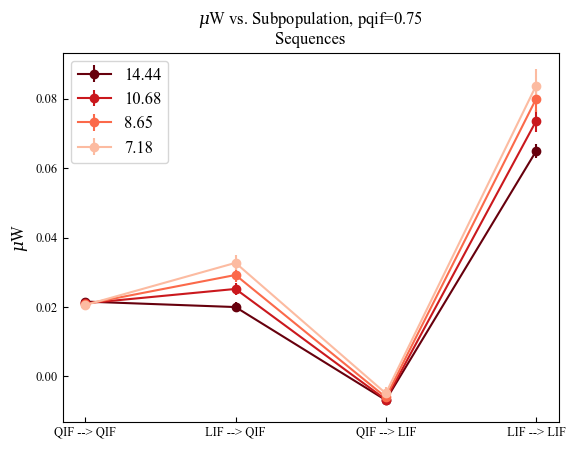

[array([(150, 150)], dtype=object), array([(150, 50)], dtype=object), array([(50, 150)], dtype=object), array([(50, 50)], dtype=object)]


In [28]:
import pandas as pd
import numpy as np
import matplotlib
import sys


########## Loop variables ##########
vrest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74
all_slopes = [14.44, 10.68, 10.74, 8.65, 7.18]

pqif_number = [0, 0.25, 0.5, 0.75, 1]
pqif_homogenous = [0, 1]
pqif_heterogenous = [0.25, 0.5, 0.75]

dynamics = ['oscillations', 'sequences']
# dynamics = ['oscillations']
seed_number = [i for i in range(0, 50)]


########## Figure variables ##########
x = [1, 2, 3, 4]  # q1...q4
x_ticks = [(rf"QIF $\rightarrow$ QIF"), (rf"LIF $\rightarrow$ QIF"), (rf"QIF $\rightarrow$ LIF"), (rf"LIF $\rightarrow$ LIF")]
# x_ticks = [(f"QIF $\rightarrow$ QIF"), (f"LIF $\rightarrow$ QIF"), (f"QIF $\rightarrow$ LIF"), (f"LIF $\rightarrow$ LIF")]
names = [f"q{i}" for i in range(1, len(list_of_quadrants) +1)]
quantifications = ['sd', 'mean']

for dyn in dynamics:

    #### Correct simulaton numbers from dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()

    for quantification in quantifications:  # we do this for both mean and standard deviation


        for pqif in pqif_heterogenous:

            fig, ax = plt.subplots()

            if quantification == 'sd':
                title = f"$\sigma$W vs. Subpopulation, pqif={pqif}"
                ylabel = f"$\sigma$W"
            elif quantification == 'mean':
                title = f"$\mu$W vs. Subpopulation, pqif={pqif}"
                ylabel = f"$\mu$W"

            for sim, vr, f in zip(simulation_number, vrest, slope):

                y = []
                yerr = []
                shape = []

                for q in names:

                        df_filtered = q_stats[(q_stats['sim'] == sim) & (q_stats['pqif'] == pqif) & (q_stats['quadrant'] == q)]

                        # x, y, yerr
                        # y_i = df_filtered[quantification].mean()  # Mean across seeds
                        # yerr_i = df_filtered[quantification].std()  # SD across seeds

                        # Try with:
                        y.append(df_filtered[quantification].mean())
                        yerr.append(df_filtered[quantification].std())

                        # y.append(y_i)
                        # yerr.append(yerr_i)

                        shape.append(df_filtered['shape'].unique())


                ########## x_ticks formatting ##########
                

                x = x  # which quadrant from 1, ..., 4
                ax.errorbar(x, y, yerr, fmt='o-', color=color_map_vrest[vr], label=f"{f}")

                # prefix = [(r"QIF $\rightarrow$ QIF"), (r"LIF $\rightarrow$ QIF"), (r"QIF $\rightarrow$ LIF"), (r"LIF $\rightarrow$ LIF")]
                prefix = [(f"QIF --> QIF"), (f"LIF --> QIF"), (f"QIF --> LIF"), (f"LIF --> LIF")]
                shapes = [v.item() for v in shape]  # Converts to the form: [(row, col), ..., (row, col)]
                shapes_formatted = [f"({a} x {b})" for a, b in shapes]  # Nicer formatting
                suffix = [f"(Post, Pre)" for a in range(1, 5)]

                x_tick_labels = {
                    f"{prefix}\n{sh}\n{suffix}"
                    for sh in shapes_formatted
                }
            
                # ax.set_xticklabels(x_tick_labels)

            xpos = [1, 2, 3, 4]
            xticks = ["test", "test", "test", "test"]
            prefix = [(f"QIF --> QIF"), (f"LIF --> QIF"), (f"QIF --> LIF"), (f"LIF --> LIF")]
            ax.set_title(f"{title}\n{dyn.capitalize()}")
            ax.set_ylabel(ylabel)
            ax.set_xticks(xpos)
            ax.set_xticklabels(prefix)
            # ax.set_xticks(xpos)

            plt.legend()
            plt.show()
            print(shape)

                        # display(df_filtered)


# New version breakdown


In [7]:
########## New version

# ========== Quantification of breakdown between subpopulations ==========

import pandas as pd
import numpy as np
import matplotlib
import sys


########## Loop variables ##########
vrest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74
all_slopes = [14.44, 10.68, 10.74, 8.65, 7.18]

pqif_number = [0, 0.25, 0.5, 0.75, 1]
pqif_homogenous = [0, 1]
pqif_heterogenous = [0.25, 0.5, 0.75]

dynamics = ['oscillations', 'sequences']
# dynamics = ['oscillations']
seed_number = [i for i in range(0, 2)]


########## Figure variables ##########
x = [1, 2, 3, 4]  # q1...q4
x_ticks = [(rf"QIF $\rightarrow$ QIF"), (rf"LIF $\rightarrow$ QIF"), (rf"QIF $\rightarrow$ LIF"), (rf"LIF $\rightarrow$ LIF")]


########## Make dataframe with necessary valyes ##########

rows = []  # Will be a dataframe with all values needed

for dyn in dynamics:

    #### Correct simulaton numbers from dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()


    # row = []
    for pqif in pqif_heterogenous:

        # fig, ax = plt.subplots()


        for sim, vr, f in zip(simulation_number, vrest, slope):

            # y = []
            # yerr = []
            # x = x

            for seed in seed_number:


                ## Access total weight matrix
                df = pd.read_csv(f'{dyn}\simulation_{sim}\simulation_{sim}_connectivity_matrix\simulation_{sim}_connectivity_pqif_{pqif}_iloop_11_seed_{seed}', header=None)

                ## Total rows, columns
                r, c = df.shape  # rows, columns (type: int)

                ## Find cut
                r_cut = int(r * pqif)  # first pqif_num rows are QIF
                c_cut = int(c * pqif)  # first pqif_num columns are QIF


                ## Make quadrants based on cut
                # (Row, column start with QIF up to pqif)
                # Columns are presynaptic, rows are postsynaptic
                q1 = df.iloc[:r_cut, :c_cut].copy()  # qif-->qif
                q2 = df.iloc[:r_cut, c_cut:].copy()  # lif-->qif   
                q3 = df.iloc[r_cut:, :c_cut].copy()  # qif-->lif
                q4 = df.iloc[r_cut:, c_cut:].copy()  # lif --> lif

                
                list_of_quadrants = [q1, q2, q3, q4]
                names = ['QIF → QIF', 'LIF → QIF', 'QIF → LIF', 'LIF → LIF']

                q_i = [f"q{i}" for i in range(1, len(list_of_quadrants) +1)]
                # print(names)

                


                for q, qi, nm in zip(list_of_quadrants, q_i, names):
                    # One row
                    q_flattened = q.values.flatten()  # Take out values of quadrant, and flatten into 1D
                    quadrant_i = qi
                    name = nm
                    mean = np.mean(q_flattened)
                    sd = np.std(q_flattened)
                    shape = q.shape

                    row = [dyn, pqif, seed, sim, vr, f, quadrant_i, name, shape, mean, sd]
                    rows.append(row)


columns = ['dyn', 'pqif', 'seed', 'sim', 'vr', 'f', 'quadrant', 'name', 'shape', 'mean', 'sd']
df_stats = pd.DataFrame(rows, columns=columns)
q_stats = df_stats.copy() # This copy now contains all values needed to plot these types of figures
display(q_stats)


########## Figure plotting ##########


,dyn,pqif,seed,sim,vr,f,quadrant,name,shape,mean,sd
0,oscillations,0.25,0,1,-8.5,14.44,q1,QIF → QIF,"(50, 50)",-0.011271,0.274642
1,oscillations,0.25,0,1,-8.5,14.44,q2,LIF → QIF,"(50, 150)",0.003826,0.277041
2,oscillations,0.25,0,1,-8.5,14.44,q3,QIF → LIF,"(150, 50)",-0.001686,0.246999
3,oscillations,0.25,0,1,-8.5,14.44,q4,LIF → LIF,"(150, 150)",0.000462,0.218953
4,oscillations,0.25,1,1,-8.5,14.44,q1,QIF → QIF,"(50, 50)",-0.007945,0.298409
...,...,...,...,...,...,...,...,...,...,...,...
187,sequences,0.75,0,12,-22.0,7.18,q4,LIF → LIF,"(50, 50)",0.083428,0.168209
188,sequences,0.75,1,12,-22.0,7.18,q1,QIF → QIF,"(150, 150)",0.021995,0.135416
189,sequences,0.75,1,12,-22.0,7.18,q2,LIF → QIF,"(150, 50)",0.030355,0.109638
190,sequences,0.75,1,12,-22.0,7.18,q3,QIF → LIF,"(50, 150)",-0.006940,0.178133


In [8]:
# Just a code block to display things I want to have a look at

# q_stats_filtered = q_stats[(q_stats['pqif']==0.25) & (q_stats['sim']==1) & (q_stats['quadrant']=='q2')]
q_stats_filtered = q_stats[(q_stats['sim']==1) & (q_stats['quadrant']=='q2')]
q_stats_sorted = q_stats_filtered.sort_values(by='quadrant', ascending=True)

display(q_stats_sorted)

,dyn,pqif,seed,sim,vr,f,quadrant,name,shape,mean,sd
1,oscillations,0.25,0,1,-8.5,14.44,q2,LIF → QIF,"(50, 150)",0.003826,0.277041
5,oscillations,0.25,1,1,-8.5,14.44,q2,LIF → QIF,"(50, 150)",0.002530,0.279386
33,oscillations,0.50,0,1,-8.5,14.44,q2,LIF → QIF,"(100, 100)",-0.000630,0.268283
37,oscillations,0.50,1,1,-8.5,14.44,q2,LIF → QIF,"(100, 100)",0.000436,0.264397
65,oscillations,0.75,0,1,-8.5,14.44,q2,LIF → QIF,"(150, 50)",-0.002500,0.264337
69,oscillations,0.75,1,1,-8.5,14.44,q2,LIF → QIF,"(150, 50)",0.000463,0.271958


In [9]:
suffix = [f"(Post, Pre)" for a in range(1, 5)]
print(suffix)

N = 200
pqif = 0.25

print(f"When pqif={pqif}, number of QIF neurons are {int(pqif * N)}, and number of LIF neurons are {int(N - (pqif * N))}")
xticks = []
for q in q_i:
    df_filtered = q_stats[(q_stats['sim'] == 1) & (q_stats['pqif'] == 0.25) & (q_stats['quadrant'] == q)]  # for all simulations across pqif, take out each four quadrant
    # print(df_filtered['quadrant'].unique())
    # print(df_filtered['name'].unique())


    name = df_filtered['name'].unique()  # e.g. QIF --> LIF
    shape = df_filtered['shape'].unique()  # e.g. (50, 150) which is (row, column) and (postsynaptic, presynaptic)
    # shapes = [v.item() for v in shape]  # Converts to the form: [(row, col), ..., (row, col)]
    shape_formatted = [f"({a} x {b})" for a, b in shape]  # Nicer formatting
    quad = df_filtered['quadrant'].unique()  # q_i
    
    ticks = f"{name}\n{shape}\n{shape_formatted[0]}\n{quad}\n(post, pre)"
    xticks.append(ticks)

for label in xticks:
    print(label)

['(Post, Pre)', '(Post, Pre)', '(Post, Pre)', '(Post, Pre)']
When pqif=0.25, number of QIF neurons are 50, and number of LIF neurons are 150
['QIF → QIF']
[(50, 50)]
(50 x 50)
['q1']
(post, pre)
['LIF → QIF']
[(50, 150)]
(50 x 150)
['q2']
(post, pre)
['QIF → LIF']
[(150, 50)]
(150 x 50)
['q3']
(post, pre)
['LIF → LIF']
[(150, 150)]
(150 x 150)
['q4']
(post, pre)


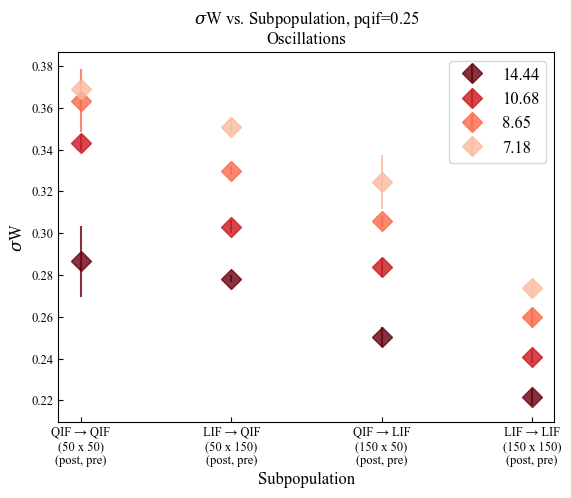

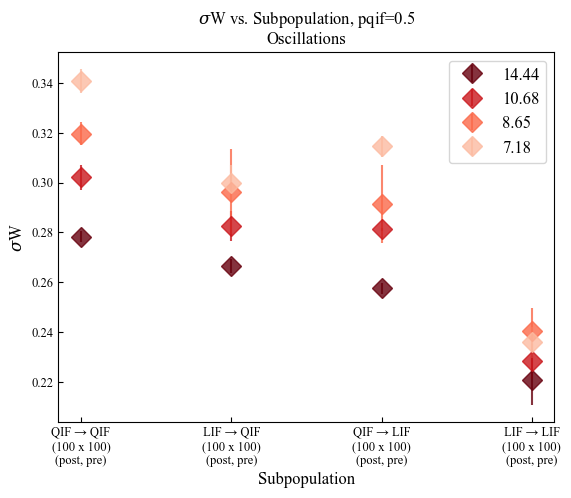

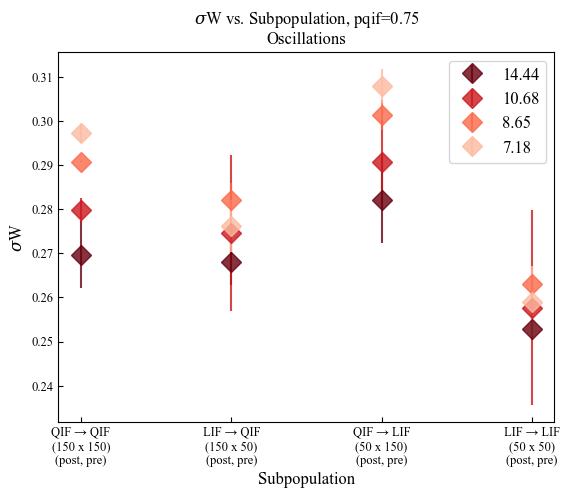

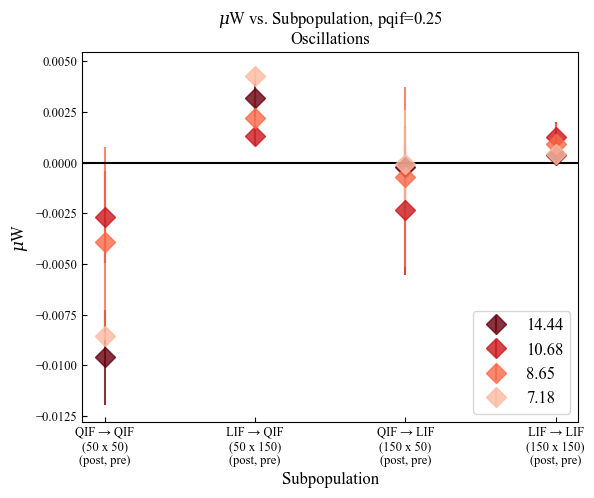

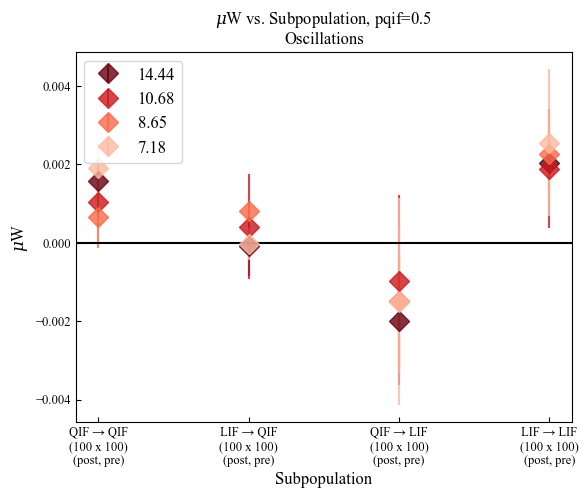

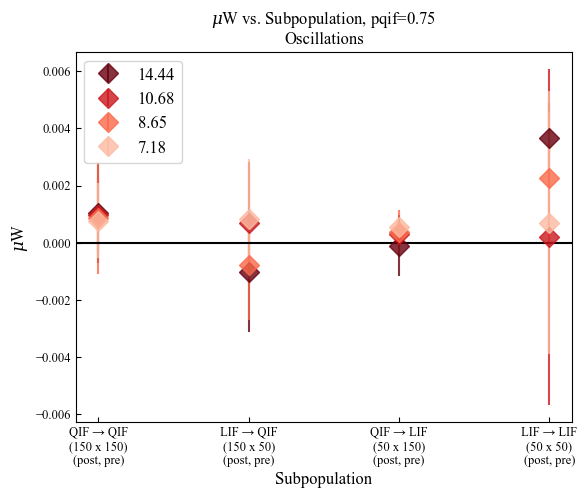

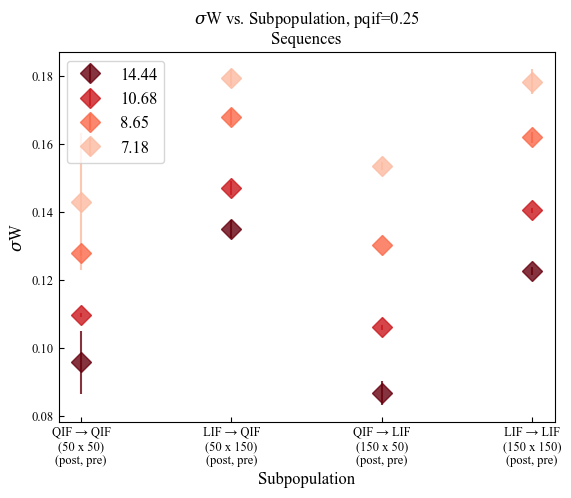

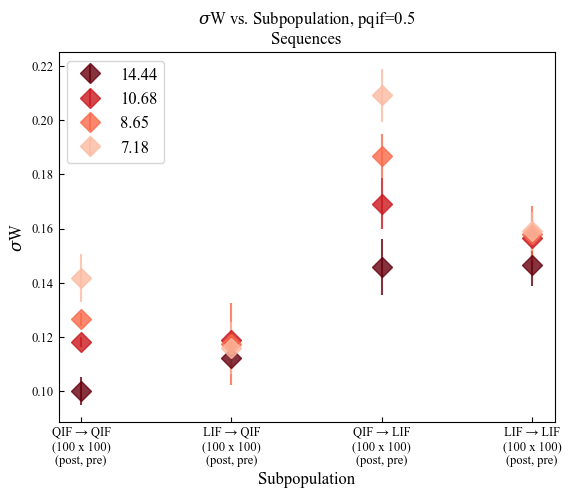

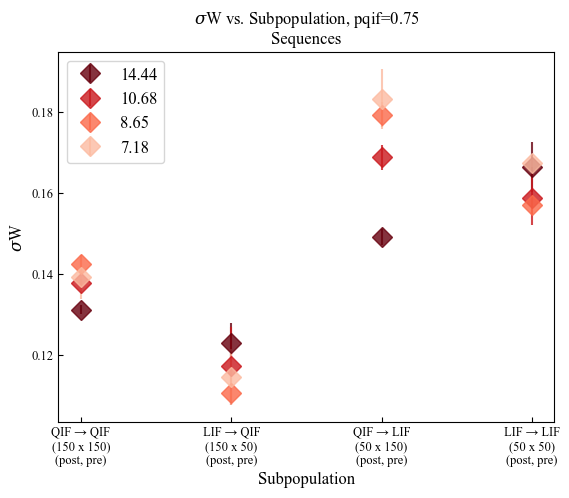

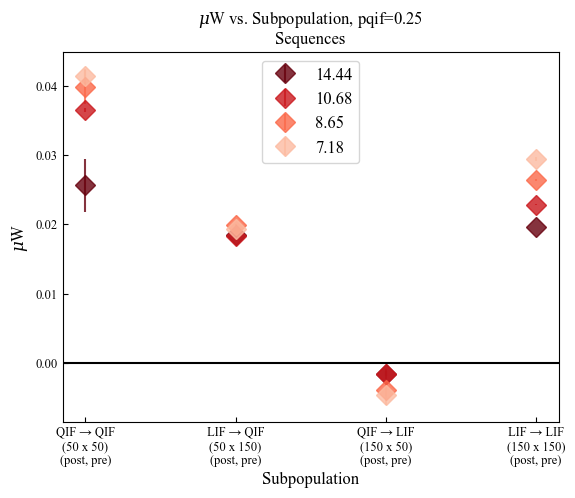

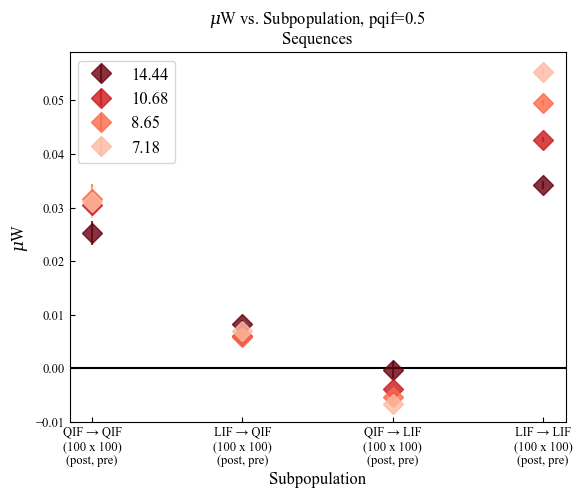

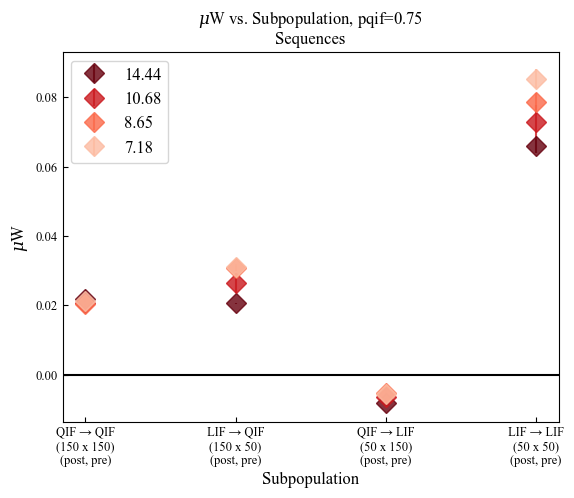

In [10]:
import pandas as pd
import numpy as np
import matplotlib
import sys


########## Loop variables ##########
vrest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74
all_slopes = [14.44, 10.68, 10.74, 8.65, 7.18]

pqif_number = [0, 0.25, 0.5, 0.75, 1]
pqif_homogenous = [0, 1]
pqif_heterogenous = [0.25, 0.5, 0.75]

dynamics = ['oscillations', 'sequences']
# dynamics = ['oscillations']
seed_number = [i for i in range(0, 2)]


########## Figure variables ##########
x = [1, 2, 3, 4]  # q1...q4
q_i = [f"q{i}" for i in range(1, len(x) +1)]
quantifications = ['sd', 'mean']

for dyn in dynamics:

    #### Correct simulaton numbers from dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()

    for quantification in quantifications:  # we do this for both mean and standard deviation


        for pqif in pqif_heterogenous:  # (0.25, 0.5, 0.75)


            fig, ax = plt.subplots()  # One figure per pqif

            # Title and labels that depend on whether standard deviation of weights or mean of weights is y-value
            if quantification == 'sd':
                title = f"$\sigma$W vs. Subpopulation, pqif={pqif}"
                ylabel = f"$\sigma$W"
            elif quantification == 'mean':
                title = f"$\mu$W vs. Subpopulation, pqif={pqif}"
                ylabel = f"$\mu$W"

            # X-ticks: Depend on what pqif is being plotted, so is added to list once for a figure. May not be used, but is helpful during analysis
            x_ticks = []
            ticked = False

            # In each figure, plot all simulations (all slopes)
            for sim, vr, f in zip(simulation_number, vrest, slope):

                # y-value and y-error
                y = []
                yerr = []

                # For x tick labels
                shapes = []
                names = []
                quad_names = []


                ########## Per simulation, get values for each quadrant ##########
                for q in q_i:  # q1, ..., q4

                        df_filtered = q_stats[(q_stats['sim'] == sim) & (q_stats['pqif'] == pqif) & (q_stats['quadrant'] == q)]  # for all simulations across pqif, take out each four quadrant

                        # Y value
                        y.append(df_filtered[quantification].mean())  # mean across seeds

                        # Yerr value
                        yerr.append(df_filtered[quantification].std())  # standard deviation across seeds

                        # X-tick labels
                        name = df_filtered['name'].unique()  # e.g. QIF --> LIF
                        shape = df_filtered['shape'].unique()  # e.g. (50, 150) which is (row, column) and (postsynaptic, presynaptic)
                        quad = df_filtered['quadrant'].unique()  # q_i

                        # Formatting of X-tick labels
                        # name_formatted = name[0]
                        shape_formatted = [f"({a} x {b})" for a, b in shape]

                        ticks = f"{name[0]}\n{shape_formatted[0]}\n(post, pre)"
                        if ticked == False:
                            x_ticks.append(ticks)

                ticked = True  # X-ticks are made Only once for each pqif figure

                ########## Plot for each simulation ##########
                # ax.errorbar(x, y, yerr, fmt='D', markersize=10, mfc='none', ecolor=color_map_vrest[vr], markeredgecolor=color_map_vrest[vr], label=f"{f}")
                # ax.errorbar(x, y, yerr, fmt='D', markersize=10, color=color_map_vrest[vr], alpha=0.8, label=f"{f}")
                ax.errorbar(q_i, y, yerr, fmt='D', markersize=10, color=color_map_vrest[vr], alpha=0.8, label=f"{f}")
                # or color=color_map_vrest[vr]


            # xnam = ['QIF → QIF', 'LIF → QIF', 'QIF → LIF', 'LIF → LIF']
            ax.set_title(f"{title}\n{dyn.capitalize()}")
            ax.set_ylabel(ylabel)
            ax.set_xticks(q_i)
            ax.set_xticklabels(x_ticks)
            # ax.set_xlim(0, 5)
            # ax.tick_params(axis='x', pad=1)
            if quantification == 'mean':
                ax.axhline(0, color='black')
            ax.set_xlabel(f"Subpopulation")

            plt.legend()
            plt.show()


# Statistical tests on breakdown

Total dataframe

In [11]:
display(q_stats)

,dyn,pqif,seed,sim,vr,f,quadrant,name,shape,mean,sd
0,oscillations,0.25,0,1,-8.5,14.44,q1,QIF → QIF,"(50, 50)",-0.011271,0.274642
1,oscillations,0.25,0,1,-8.5,14.44,q2,LIF → QIF,"(50, 150)",0.003826,0.277041
2,oscillations,0.25,0,1,-8.5,14.44,q3,QIF → LIF,"(150, 50)",-0.001686,0.246999
3,oscillations,0.25,0,1,-8.5,14.44,q4,LIF → LIF,"(150, 150)",0.000462,0.218953
4,oscillations,0.25,1,1,-8.5,14.44,q1,QIF → QIF,"(50, 50)",-0.007945,0.298409
...,...,...,...,...,...,...,...,...,...,...,...
187,sequences,0.75,0,12,-22.0,7.18,q4,LIF → LIF,"(50, 50)",0.083428,0.168209
188,sequences,0.75,1,12,-22.0,7.18,q1,QIF → QIF,"(150, 150)",0.021995,0.135416
189,sequences,0.75,1,12,-22.0,7.18,q2,LIF → QIF,"(150, 50)",0.030355,0.109638
190,sequences,0.75,1,12,-22.0,7.18,q3,QIF → LIF,"(50, 150)",-0.006940,0.178133


## ANOVA

In [15]:
display(q_stats)

,dyn,pqif,seed,sim,vr,f,quadrant,name,shape,mean,sd
0,oscillations,0.25,0,1,-8.5,14.44,q1,QIF → QIF,"(50, 50)",-0.011271,0.274642
1,oscillations,0.25,0,1,-8.5,14.44,q2,LIF → QIF,"(50, 150)",0.003826,0.277041
2,oscillations,0.25,0,1,-8.5,14.44,q3,QIF → LIF,"(150, 50)",-0.001686,0.246999
3,oscillations,0.25,0,1,-8.5,14.44,q4,LIF → LIF,"(150, 150)",0.000462,0.218953
4,oscillations,0.25,1,1,-8.5,14.44,q1,QIF → QIF,"(50, 50)",-0.007945,0.298409
...,...,...,...,...,...,...,...,...,...,...,...
187,sequences,0.75,0,12,-22.0,7.18,q4,LIF → LIF,"(50, 50)",0.083428,0.168209
188,sequences,0.75,1,12,-22.0,7.18,q1,QIF → QIF,"(150, 150)",0.021995,0.135416
189,sequences,0.75,1,12,-22.0,7.18,q2,LIF → QIF,"(150, 50)",0.030355,0.109638
190,sequences,0.75,1,12,-22.0,7.18,q3,QIF → LIF,"(50, 150)",-0.006940,0.178133


In [14]:
# display(q_stats)

from scipy.stats import ttest_rel
import itertools
import pandas as pd
from statsmodels.stats.anova import AnovaRM

# Filter out the one I want (only looking at composition)
########## Loop variables ##########
vrest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74
all_slopes = [14.44, 10.68, 10.74, 8.65, 7.18]

pqif_number = [0, 0.25, 0.5, 0.75, 1]
pqif_homogenous = [0, 1]
pqif_heterogenous = [0.25, 0.5, 0.75]

dynamics = ['oscillations', 'sequences']
# dynamics = ['oscillations']
seed_number = [i for i in range(0, 2)]


########## Figure variables ##########
x = [1, 2, 3, 4]  # q1...q4
q_i = [f"q{i}" for i in range(1, len(x) +1)]
quantifications = ['sd', 'mean']

for dyn in dynamics:

    #### Correct simulaton numbers from dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()

    for pqif in pqif_heterogenous:  # (0.25, 0.5, 0.75)

        # In each figure, plot all simulations (all slopes)
        for sim, vr, f in zip(simulation_number, vrest, slope):

            anova_df = q_stats[
                (q_stats['dyn'] == dyn) &
                (q_stats['sim']== sim) &
                (q_stats['pqif']==pqif)
                ]
            
            # display(anova_filter)

            # the dataframe is now filtered to:
            # one dynamics condition
            # one simulation
            # one pqif value

            # Columns needed:
            #   seed -> subject identifier
            #   composition -> within-subject factor
            #   value -> dependent variable

            anova = AnovaRM(
                data = anova_df,
                depvar='sd',
                subject='seed',
                within=['quadrant']  # could be multiple within-subject factors here, therefore passed as a list
            )

            anova_result = anova.fit()

            print(anova_result)

                Anova
         F Value Num DF Den DF Pr > F
-------------------------------------
quadrant 37.2987 3.0000 3.0000 0.0071

                Anova
         F Value  Num DF Den DF Pr > F
--------------------------------------
quadrant 215.5274 3.0000 3.0000 0.0005

                Anova
         F Value Num DF Den DF Pr > F
-------------------------------------
quadrant 50.5839 3.0000 3.0000 0.0046

                Anova
         F Value Num DF Den DF Pr > F
-------------------------------------
quadrant 65.0634 3.0000 3.0000 0.0031

                Anova
         F Value Num DF Den DF Pr > F
-------------------------------------
quadrant 35.9085 3.0000 3.0000 0.0075

                Anova
         F Value Num DF Den DF Pr > F
-------------------------------------
quadrant 54.4814 3.0000 3.0000 0.0041

                Anova
         F Value Num DF Den DF Pr > F
-------------------------------------
quadrant 10.4688 3.0000 3.0000 0.0425

                Anova
         F Value

### Post hoc: Pairwise t-test

In [20]:
from scipy.stats import ttest_rel
import itertools
import pandas as pd
# df_filtered = q_stats[q_stats['sim']==1]
from statsmodels.stats.multitest import multipletests

# Filter out the one I want (only looking at composition)
########## Loop variables ##########
vrest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74
all_slopes = [14.44, 10.68, 10.74, 8.65, 7.18]

pqif_number = [0, 0.25, 0.5, 0.75, 1]
pqif_homogenous = [0, 1]
pqif_heterogenous = [0.25, 0.5, 0.75]

dynamics = ['oscillations', 'sequences']
# dynamics = ['oscillations']
seed_number = [i for i in range(0, 2)]


########## Figure variables ##########
x = [1, 2, 3, 4]  # q1...q4
q_i = [f"q{i}" for i in range(1, len(x) +1)]
quantifications = ['sd', 'mean']

for dyn in dynamics:

    #### Correct simulaton numbers from dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()

    for pqif in pqif_heterogenous:  # (0.25, 0.5, 0.75)

        # In each figure, plot all simulations (all slopes)
        for sim, vr, f in zip(simulation_number, vrest, slope):

            df_subset = q_stats[
                (q_stats['dyn']==dyn) &
                (q_stats['sim']==sim) &
                (q_stats['pqif']==pqif)
            ]

            df_wide = df_subset.pivot(
                index='seed',
                columns='quadrant',
                values='sd'
            )

            print(f"Quadrants and their standard deviation of weights for {dyn}, simulation {sim}, pqif={pqif}:")
            display(df_wide)

            results = []

            # ttest_rel: a test for the null hypothesis that two related or repeated samples have identical average (expected) values

            for c1, c2 in itertools.combinations(df_wide.columns, 2):
                t, p = ttest_rel(df_wide[c1], df_wide[c2])
                results.append(
                    {"comp1": c1, 
                    "comp2": c2, 
                    "t_statistic": t, # t-statistic
                    "p_value": p}  # p-value associated with the given alternative
                    )
                
            posthoc_df = pd.DataFrame(results)  # collect results into dataframe

            print(f"Pairwise t-test for {dyn}, simulation {sim}, pqif={pqif}:")
            display(posthoc_df)

            # Holm-Bonferroni correction
            reject, p_corr, _, _ = multipletests(
                posthoc_df["p_value"],
                method="holm"
            )

            posthoc_df["p_corrected"] = p_corr
            posthoc_df["significant"] = reject

            display(posthoc_df)


Quadrants and their standard deviation of weights for oscillations, simulation 1, pqif=0.25:


quadrant,q1,q2,q3,q4
seed,,,,
0,0.274642,0.277041,0.246999,0.218953
1,0.298409,0.279386,0.253669,0.224618


Pairwise t-test for oscillations, simulation 1, pqif=0.25:


,comp1,comp2,t_statistic,p_value
0,q1,q2,0.776009,0.579869
1,q1,q3,4.233706,0.147663
2,q1,q4,7.152838,0.088429
3,q2,q3,12.892269,0.049281
4,q2,q4,33.996194,0.018721
5,q3,q4,56.797644,0.011207


,comp1,comp2,t_statistic,p_value,p_corrected,significant
0,q1,q2,0.776009,0.579869,0.579869,False
1,q1,q3,4.233706,0.147663,0.295326,False
2,q1,q4,7.152838,0.088429,0.265288,False
3,q2,q3,12.892269,0.049281,0.197125,False
4,q2,q4,33.996194,0.018721,0.093604,False
5,q3,q4,56.797644,0.011207,0.067244,False


Quadrants and their standard deviation of weights for oscillations, simulation 2, pqif=0.25:


quadrant,q1,q2,q3,q4
seed,,,,
0,0.346040,0.305276,0.280997,0.238750
1,0.340541,0.301125,0.286767,0.243217


Pairwise t-test for oscillations, simulation 2, pqif=0.25:


,comp1,comp2,t_statistic,p_value
0,q1,q2,59.467753,0.010704
1,q1,q3,10.543916,0.060198
2,q1,q4,20.531058,0.030983
3,q2,q3,3.894600,0.160006
4,q2,q4,14.439146,0.044020
5,q3,q4,65.860070,0.009666


,comp1,comp2,t_statistic,p_value,p_corrected,significant
0,q1,q2,59.467753,0.010704,0.057993,False
1,q1,q3,10.543916,0.060198,0.132059,False
2,q1,q4,20.531058,0.030983,0.123933,False
3,q2,q3,3.894600,0.160006,0.160006,False
4,q2,q4,14.439146,0.044020,0.132059,False
5,q3,q4,65.860070,0.009666,0.057993,False


Quadrants and their standard deviation of weights for oscillations, simulation 3, pqif=0.25:


quadrant,q1,q2,q3,q4
seed,,,,
0,0.374145,0.328592,0.307647,0.256576
1,0.352884,0.331272,0.303943,0.263006


Pairwise t-test for oscillations, simulation 3, pqif=0.25:


,comp1,comp2,t_statistic,p_value
0,q1,q2,2.805393,0.217988
1,q1,q3,6.574986,0.096088
2,q1,q4,7.491199,0.084483
3,q2,q3,7.561522,0.083706
4,q2,q4,37.401267,0.017017
5,q3,q4,9.078411,0.069843


,comp1,comp2,t_statistic,p_value,p_corrected,significant
0,q1,q2,2.805393,0.217988,0.349215,False
1,q1,q3,6.574986,0.096088,0.349215,False
2,q1,q4,7.491199,0.084483,0.349215,False
3,q2,q3,7.561522,0.083706,0.349215,False
4,q2,q4,37.401267,0.017017,0.102104,False
5,q3,q4,9.078411,0.069843,0.349215,False


Quadrants and their standard deviation of weights for oscillations, simulation 4, pqif=0.25:


quadrant,q1,q2,q3,q4
seed,,,,
0,0.370792,0.348799,0.333636,0.272867
1,0.367315,0.353097,0.315237,0.275122


Pairwise t-test for oscillations, simulation 4, pqif=0.25:


,comp1,comp2,t_statistic,p_value
0,q1,q2,4.657182,0.134652
1,q1,q3,5.980498,0.105474
2,q1,q4,33.167757,0.019188
3,q2,q3,2.336222,0.257477
4,q2,q4,75.323815,0.008451
5,q3,q4,4.884740,0.128552


,comp1,comp2,t_statistic,p_value,p_corrected,significant
0,q1,q2,4.657182,0.134652,0.421894,False
1,q1,q3,5.980498,0.105474,0.421894,False
2,q1,q4,33.167757,0.019188,0.095941,False
3,q2,q3,2.336222,0.257477,0.421894,False
4,q2,q4,75.323815,0.008451,0.050708,False
5,q3,q4,4.884740,0.128552,0.421894,False


Quadrants and their standard deviation of weights for oscillations, simulation 1, pqif=0.5:


quadrant,q1,q2,q3,q4
seed,,,,
0,0.279938,0.268283,0.255970,0.213516
1,0.276663,0.264397,0.258973,0.227557


Pairwise t-test for oscillations, simulation 1, pqif=0.5:


,comp1,comp2,t_statistic,p_value
0,q1,q2,39.176698,0.016246
1,q1,q3,6.635378,0.095227
2,q1,q4,6.671384,0.094720
3,q2,q3,2.574733,0.235841
4,q2,q4,5.109806,0.123033
5,q3,q4,6.691862,0.094435


,comp1,comp2,t_statistic,p_value,p_corrected,significant
0,q1,q2,39.176698,0.016246,0.097479,False
1,q1,q3,6.635378,0.095227,0.472173,False
2,q1,q4,6.671384,0.094720,0.472173,False
3,q2,q3,2.574733,0.235841,0.472173,False
4,q2,q4,5.109806,0.123033,0.472173,False
5,q3,q4,6.691862,0.094435,0.472173,False


Quadrants and their standard deviation of weights for oscillations, simulation 2, pqif=0.5:


quadrant,q1,q2,q3,q4
seed,,,,
0,0.298512,0.278122,0.281536,0.233171
1,0.305716,0.286843,0.280867,0.223184


Pairwise t-test for oscillations, simulation 2, pqif=0.5:


,comp1,comp2,t_statistic,p_value
0,q1,q2,25.885849,0.024581
1,q1,q3,5.312173,0.118455
2,q1,q4,8.601616,0.073681
3,q2,q3,0.272850,0.830426
4,q2,q4,5.805538,0.108592
5,q3,q4,11.381095,0.055793


,comp1,comp2,t_statistic,p_value,p_corrected,significant
0,q1,q2,25.885849,0.024581,0.147487,False
1,q1,q3,5.312173,0.118455,0.325775,False
2,q1,q4,8.601616,0.073681,0.294724,False
3,q2,q3,0.272850,0.830426,0.830426,False
4,q2,q4,5.805538,0.108592,0.325775,False
5,q3,q4,11.381095,0.055793,0.278967,False


Quadrants and their standard deviation of weights for oscillations, simulation 3, pqif=0.5:


quadrant,q1,q2,q3,q4
seed,,,,
0,0.322883,0.284173,0.302585,0.233442
1,0.316375,0.308546,0.280477,0.246923


Pairwise t-test for oscillations, simulation 3, pqif=0.5:


,comp1,comp2,t_statistic,p_value
0,q1,q2,1.507017,0.372964
1,q1,q3,3.602330,0.172384
2,q1,q4,7.948713,0.079672
3,q2,q3,0.207780,0.869579
4,q2,q4,10.315887,0.061520
5,q3,q4,2.885567,0.212376


,comp1,comp2,t_statistic,p_value,p_corrected,significant
0,q1,q2,1.507017,0.372964,0.745928,False
1,q1,q3,3.602330,0.172384,0.689536,False
2,q1,q4,7.948713,0.079672,0.398362,False
3,q2,q3,0.207780,0.869579,0.869579,False
4,q2,q4,10.315887,0.061520,0.369122,False
5,q3,q4,2.885567,0.212376,0.689536,False


Quadrants and their standard deviation of weights for oscillations, simulation 4, pqif=0.5:


quadrant,q1,q2,q3,q4
seed,,,,
0,0.337416,0.294998,0.317556,0.240321
1,0.344139,0.304851,0.311534,0.231403


Pairwise t-test for oscillations, simulation 4, pqif=0.5:


,comp1,comp2,t_statistic,p_value
0,q1,q2,26.103914,0.024376
1,q1,q3,4.116871,0.151699
2,q1,q4,13.416243,0.047364
3,q2,q3,-1.842050,0.316626
4,q2,q4,6.826013,0.092605
5,q3,q4,54.337240,0.011715


,comp1,comp2,t_statistic,p_value,p_corrected,significant
0,q1,q2,26.103914,0.024376,0.121880,False
1,q1,q3,4.116871,0.151699,0.303398,False
2,q1,q4,13.416243,0.047364,0.189455,False
3,q2,q3,-1.842050,0.316626,0.316626,False
4,q2,q4,6.826013,0.092605,0.277815,False
5,q3,q4,54.337240,0.011715,0.070289,False


Quadrants and their standard deviation of weights for oscillations, simulation 1, pqif=0.75:


quadrant,q1,q2,q3,q4
seed,,,,
0,0.275075,0.264337,0.289132,0.254751
1,0.264390,0.271958,0.275271,0.251132


Pairwise t-test for oscillations, simulation 1, pqif=0.75:


,comp1,comp2,t_statistic,p_value
0,q1,q2,0.173170,0.890839
1,q1,q3,-7.854068,0.080622
2,q1,q4,4.752197,0.132037
3,q2,q3,-1.308471,0.415432
4,q2,q4,2.705781,0.225370
5,q3,q4,5.713831,0.110300


,comp1,comp2,t_statistic,p_value,p_corrected,significant
0,q1,q2,0.173170,0.890839,0.890839,False
1,q1,q3,-7.854068,0.080622,0.483734,False
2,q1,q4,4.752197,0.132037,0.551501,False
3,q2,q3,-1.308471,0.415432,0.830865,False
4,q2,q4,2.705781,0.225370,0.676109,False
5,q3,q4,5.713831,0.110300,0.551501,False


Quadrants and their standard deviation of weights for oscillations, simulation 2, pqif=0.75:


quadrant,q1,q2,q3,q4
seed,,,,
0,0.281692,0.262131,0.297386,0.242044
1,0.277758,0.287112,0.284082,0.273270


Pairwise t-test for oscillations, simulation 2, pqif=0.75:


,comp1,comp2,t_statistic,p_value
0,q1,q2,0.353007,0.783962
1,q1,q3,-2.349656,0.256159
2,q1,q4,1.255314,0.428237
3,q2,q3,-0.841702,0.554585
4,q2,q4,5.433201,0.115875
5,q3,q4,1.485600,0.377174


,comp1,comp2,t_statistic,p_value,p_corrected,significant
0,q1,q2,0.353007,0.783962,1.000000,False
1,q1,q3,-2.349656,0.256159,1.000000,False
2,q1,q4,1.255314,0.428237,1.000000,False
3,q2,q3,-0.841702,0.554585,1.000000,False
4,q2,q4,5.433201,0.115875,0.695252,False
5,q3,q4,1.485600,0.377174,1.000000,False


Quadrants and their standard deviation of weights for oscillations, simulation 3, pqif=0.75:


quadrant,q1,q2,q3,q4
seed,,,,
0,0.290879,0.284803,0.299026,0.260716
1,0.290716,0.279625,0.303750,0.265316


Pairwise t-test for oscillations, simulation 3, pqif=0.75:


,comp1,comp2,t_statistic,p_value
0,q1,q2,3.422969,0.180949
1,q1,q3,-4.335092,0.144328
2,q1,q4,11.664395,0.054445
3,q2,q3,-3.873075,0.160858
4,q2,q4,3.926500,0.158759
5,q3,q4,626.715771,0.001016


,comp1,comp2,t_statistic,p_value,p_corrected,significant
0,q1,q2,3.422969,0.180949,0.577312,False
1,q1,q3,-4.335092,0.144328,0.577312,False
2,q1,q4,11.664395,0.054445,0.272225,False
3,q2,q3,-3.873075,0.160858,0.577312,False
4,q2,q4,3.926500,0.158759,0.577312,False
5,q3,q4,626.715771,0.001016,0.006095,True


Quadrants and their standard deviation of weights for oscillations, simulation 4, pqif=0.75:


quadrant,q1,q2,q3,q4
seed,,,,
0,0.295707,0.280405,0.305318,0.264705
1,0.298728,0.272094,0.310675,0.253123


Pairwise t-test for oscillations, simulation 4, pqif=0.75:


,comp1,comp2,t_statistic,p_value
0,q1,q2,3.700769,0.168011
1,q1,q3,-9.226378,0.068732
2,q1,q4,5.246291,0.119908
3,q2,q3,-4.645348,0.134985
4,q2,q4,10.601041,0.059875
5,q3,q4,5.795299,0.108780


,comp1,comp2,t_statistic,p_value,p_corrected,significant
0,q1,q2,3.700769,0.168011,0.435120,False
1,q1,q3,-9.226378,0.068732,0.359252,False
2,q1,q4,5.246291,0.119908,0.435120,False
3,q2,q3,-4.645348,0.134985,0.435120,False
4,q2,q4,10.601041,0.059875,0.359252,False
5,q3,q4,5.795299,0.108780,0.435120,False


Quadrants and their standard deviation of weights for sequences, simulation 9, pqif=0.25:


quadrant,q1,q2,q3,q4
seed,,,,
0,0.089272,0.136860,0.089177,0.123470
1,0.102403,0.133254,0.084242,0.121742


Pairwise t-test for sequences, simulation 9, pqif=0.25:


,comp1,comp2,t_statistic,p_value
0,q1,q2,-4.686716,0.133828
1,q1,q3,1.010557,0.496657
2,q1,q4,-3.603277,0.172341
3,q2,q3,72.767988,0.008748
4,q2,q4,13.255619,0.047936
5,q3,q4,-22.383412,0.028423


,comp1,comp2,t_statistic,p_value,p_corrected,significant
0,q1,q2,-4.686716,0.133828,0.401484,False
1,q1,q3,1.010557,0.496657,0.496657,False
2,q1,q4,-3.603277,0.172341,0.401484,False
3,q2,q3,72.767988,0.008748,0.052488,False
4,q2,q4,13.255619,0.047936,0.191742,False
5,q3,q4,-22.383412,0.028423,0.142113,False


Quadrants and their standard deviation of weights for sequences, simulation 10, pqif=0.25:


quadrant,q1,q2,q3,q4
seed,,,,
0,0.109299,0.148578,0.106688,0.141103
1,0.110266,0.145595,0.105543,0.139930


Pairwise t-test for sequences, simulation 10, pqif=0.25:


,comp1,comp2,t_statistic,p_value
0,q1,q2,-18.890383,0.033669
1,q1,q3,3.474316,0.178414
2,q1,q4,-28.735160,0.022146
3,q2,q3,44.565405,0.014283
4,q2,q4,7.258146,0.087162
5,q3,q4,-2433.227905,0.000262


,comp1,comp2,t_statistic,p_value,p_corrected,significant
0,q1,q2,-18.890383,0.033669,0.101008,False
1,q1,q3,3.474316,0.178414,0.178414,False
2,q1,q4,-28.735160,0.022146,0.088583,False
3,q2,q3,44.565405,0.014283,0.071413,False
4,q2,q4,7.258146,0.087162,0.174325,False
5,q3,q4,-2433.227905,0.000262,0.001570,True


Quadrants and their standard deviation of weights for sequences, simulation 11, pqif=0.25:


quadrant,q1,q2,q3,q4
seed,,,,
0,0.127380,0.169644,0.130304,0.163125
1,0.128617,0.166318,0.130357,0.160860


Pairwise t-test for sequences, simulation 11, pqif=0.25:


,comp1,comp2,t_statistic,p_value
0,q1,q2,-17.523997,0.036289
1,q1,q3,-3.937981,0.158315
2,q1,q4,-19.410310,0.032769
3,q2,q3,22.286015,0.028547
4,q2,q4,11.293468,0.056224
5,q3,q4,-27.314121,0.023297


,comp1,comp2,t_statistic,p_value,p_corrected,significant
0,q1,q2,-17.523997,0.036289,0.142734,False
1,q1,q3,-3.937981,0.158315,0.158315,False
2,q1,q4,-19.410310,0.032769,0.142734,False
3,q2,q3,22.286015,0.028547,0.142734,False
4,q2,q4,11.293468,0.056224,0.142734,False
5,q3,q4,-27.314121,0.023297,0.139782,False


Quadrants and their standard deviation of weights for sequences, simulation 12, pqif=0.25:


quadrant,q1,q2,q3,q4
seed,,,,
0,0.128842,0.177859,0.152668,0.175764
1,0.157420,0.181365,0.154500,0.180987


Pairwise t-test for sequences, simulation 12, pqif=0.25:


,comp1,comp2,t_statistic,p_value
0,q1,q2,-2.910032,0.210719
1,q1,q3,-0.781637,0.577639
2,q1,q4,-3.018081,0.203688
3,q2,q3,31.105199,0.020460
4,q2,q4,1.440411,0.386335
5,q3,q4,-14.623242,0.043467


,comp1,comp2,t_statistic,p_value,p_corrected,significant
0,q1,q2,-2.910032,0.210719,0.814752,False
1,q1,q3,-0.781637,0.577639,0.814752,False
2,q1,q4,-3.018081,0.203688,0.814752,False
3,q2,q3,31.105199,0.020460,0.122758,False
4,q2,q4,1.440411,0.386335,0.814752,False
5,q3,q4,-14.623242,0.043467,0.217336,False


Quadrants and their standard deviation of weights for sequences, simulation 9, pqif=0.5:


quadrant,q1,q2,q3,q4
seed,,,,
0,0.096462,0.115981,0.138430,0.152301
1,0.103793,0.108314,0.153021,0.141205


Pairwise t-test for sequences, simulation 9, pqif=0.5:


,comp1,comp2,t_statistic,p_value
0,q1,q2,-1.602801,0.355115
1,q1,q3,-12.561550,0.050573
2,q1,q4,-5.060433,0.124203
3,q2,q3,-3.017127,0.203748
4,q2,q4,-20.184131,0.031515
5,q3,q4,-0.079999,0.949179


,comp1,comp2,t_statistic,p_value,p_corrected,significant
0,q1,q2,-1.602801,0.355115,0.710230,False
1,q1,q3,-12.561550,0.050573,0.252867,False
2,q1,q4,-5.060433,0.124203,0.496813,False
3,q2,q3,-3.017127,0.203748,0.611244,False
4,q2,q4,-20.184131,0.031515,0.189089,False
5,q3,q4,-0.079999,0.949179,0.949179,False


Quadrants and their standard deviation of weights for sequences, simulation 10, pqif=0.5:


quadrant,q1,q2,q3,q4
seed,,,,
0,0.11702,0.116845,0.175890,0.149553
1,0.11959,0.121262,0.162564,0.163225


Pairwise t-test for sequences, simulation 10, pqif=0.5:


,comp1,comp2,t_statistic,p_value
0,q1,q2,-0.810006,0.566581
1,q1,q3,-6.406738,0.098572
2,q1,q4,-6.861023,0.092139
3,q2,q3,-5.655492,0.111415
4,q2,q4,-8.068720,0.078499
5,q3,q4,0.951056,0.515967


,comp1,comp2,t_statistic,p_value,p_corrected,significant
0,q1,q2,-0.810006,0.566581,1.000000,False
1,q1,q3,-6.406738,0.098572,0.470997,False
2,q1,q4,-6.861023,0.092139,0.470997,False
3,q2,q3,-5.655492,0.111415,0.470997,False
4,q2,q4,-8.068720,0.078499,0.470997,False
5,q3,q4,0.951056,0.515967,1.000000,False


Quadrants and their standard deviation of weights for sequences, simulation 11, pqif=0.5:


quadrant,q1,q2,q3,q4
seed,,,,
0,0.128217,0.106909,0.192491,0.151058
1,0.124910,0.128193,0.181150,0.165270


Pairwise t-test for sequences, simulation 11, pqif=0.5:


,comp1,comp2,t_statistic,p_value
0,q1,q2,0.733006,0.597315
1,q1,q3,-15.000707,0.042377
2,q1,q4,-3.607644,0.172142
3,q2,q3,-4.246439,0.147236
4,q2,q4,-11.485355,0.055289
5,q3,q4,2.242926,0.266995


,comp1,comp2,t_statistic,p_value,p_corrected,significant
0,q1,q2,0.733006,0.597315,0.597315,False
1,q1,q3,-15.000707,0.042377,0.254260,False
2,q1,q4,-3.607644,0.172142,0.588944,False
3,q2,q3,-4.246439,0.147236,0.588944,False
4,q2,q4,-11.485355,0.055289,0.276447,False
5,q3,q4,2.242926,0.266995,0.588944,False


Quadrants and their standard deviation of weights for sequences, simulation 12, pqif=0.5:


quadrant,q1,q2,q3,q4
seed,,,,
0,0.135604,0.122708,0.202285,0.163947
1,0.148064,0.109077,0.215938,0.153919


Pairwise t-test for sequences, simulation 12, pqif=0.5:


,comp1,comp2,t_statistic,p_value
0,q1,q2,1.988592,0.296626
1,q1,q3,-112.702040,0.005649
2,q1,q4,-1.520831,0.370293
3,q2,q3,-6.833221,0.092509
4,q2,q4,-23.887708,0.026635
5,q3,q4,4.237962,0.147520


,comp1,comp2,t_statistic,p_value,p_corrected,significant
0,q1,q2,1.988592,0.296626,0.593253,False
1,q1,q3,-112.702040,0.005649,0.033891,True
2,q1,q4,-1.520831,0.370293,0.593253,False
3,q2,q3,-6.833221,0.092509,0.370035,False
4,q2,q4,-23.887708,0.026635,0.133175,False
5,q3,q4,4.237962,0.147520,0.442560,False


Quadrants and their standard deviation of weights for sequences, simulation 9, pqif=0.75:


quadrant,q1,q2,q3,q4
seed,,,,
0,0.131970,0.126380,0.147899,0.170982
1,0.130382,0.119563,0.150647,0.162204


Pairwise t-test for sequences, simulation 9, pqif=0.75:


,comp1,comp2,t_statistic,p_value
0,q1,q2,3.137979,0.196398
1,q1,q3,-8.346855,0.075909
2,q1,q4,-9.851069,0.064404
3,q2,q3,-5.499248,0.114514
4,q2,q4,-44.487156,0.014308
5,q3,q4,-3.005159,0.204505


,comp1,comp2,t_statistic,p_value,p_corrected,significant
0,q1,q2,3.137979,0.196398,0.392797,False
1,q1,q3,-8.346855,0.075909,0.322019,False
2,q1,q4,-9.851069,0.064404,0.322019,False
3,q2,q3,-5.499248,0.114514,0.343541,False
4,q2,q4,-44.487156,0.014308,0.085847,False
5,q3,q4,-3.005159,0.204505,0.392797,False


Quadrants and their standard deviation of weights for sequences, simulation 10, pqif=0.75:


quadrant,q1,q2,q3,q4
seed,,,,
0,0.138542,0.110441,0.166753,0.163431
1,0.137141,0.124181,0.170997,0.154055


Pairwise t-test for sequences, simulation 10, pqif=0.75:


,comp1,comp2,t_statistic,p_value
0,q1,q2,2.711767,0.224912
1,q1,q3,-10.994136,0.057746
2,q1,q4,-5.241571,0.120014
3,q2,q3,-10.859829,0.058457
4,q2,q4,-3.584542,0.173198
5,q3,q4,1.487719,0.376753


,comp1,comp2,t_statistic,p_value,p_corrected,significant
0,q1,q2,2.711767,0.224912,0.519594,False
1,q1,q3,-10.994136,0.057746,0.346479,False
2,q1,q4,-5.241571,0.120014,0.480055,False
3,q2,q3,-10.859829,0.058457,0.346479,False
4,q2,q4,-3.584542,0.173198,0.519594,False
5,q3,q4,1.487719,0.376753,0.519594,False


Quadrants and their standard deviation of weights for sequences, simulation 11, pqif=0.75:


quadrant,q1,q2,q3,q4
seed,,,,
0,0.144054,0.110064,0.181622,0.155349
1,0.141117,0.110971,0.177246,0.158840


Pairwise t-test for sequences, simulation 11, pqif=0.75:


,comp1,comp2,t_statistic,p_value
0,q1,q2,16.686122,0.038107
1,q1,q3,-51.226105,0.012426
2,q1,q4,-4.514141,0.138787
3,q2,q3,-26.093122,0.024386
4,q2,q4,-36.041011,0.017659
5,q3,q4,5.679126,0.110961


,comp1,comp2,t_statistic,p_value,p_corrected,significant
0,q1,q2,16.686122,0.038107,0.114321,False
1,q1,q3,-51.226105,0.012426,0.074556,False
2,q1,q4,-4.514141,0.138787,0.221921,False
3,q2,q3,-26.093122,0.024386,0.097544,False
4,q2,q4,-36.041011,0.017659,0.088296,False
5,q3,q4,5.679126,0.110961,0.221921,False


Quadrants and their standard deviation of weights for sequences, simulation 12, pqif=0.75:


quadrant,q1,q2,q3,q4
seed,,,,
0,0.143230,0.119457,0.188557,0.168209
1,0.135416,0.109638,0.178133,0.166722


Pairwise t-test for sequences, simulation 12, pqif=0.75:


,comp1,comp2,t_statistic,p_value
0,q1,q2,24.710311,0.025749
1,q1,q3,-33.735632,0.018865
2,q1,q4,-8.895719,0.071266
3,q2,q3,-227.596918,0.002797
4,q2,q4,-12.701619,0.050018
5,q3,q4,3.553663,0.174629


,comp1,comp2,t_statistic,p_value,p_corrected,significant
0,q1,q2,24.710311,0.025749,0.102997,False
1,q1,q3,-33.735632,0.018865,0.094327,False
2,q1,q4,-8.895719,0.071266,0.150054,False
3,q2,q3,-227.596918,0.002797,0.016783,True
4,q2,q4,-12.701619,0.050018,0.150054,False
5,q3,q4,3.553663,0.174629,0.174629,False


### Other stuff

In [ ]:
# Reshape dataframe

df_wide = q_stats.pivot(
    index=['seed', 'sim', 'pqif'],
    columns='quadrant',
    values='sd'
)

display(df_wide)

quadrant             q1        q2        q3        q4
seed sim pqif                                        
0    1   0.25  0.274642  0.277041  0.246999  0.218953
         0.50  0.279938  0.268283  0.255970  0.213516
         0.75  0.275075  0.264337  0.289132  0.254751
     2   0.25  0.346040  0.305276  0.280997  0.238750
         0.50  0.298512  0.278122  0.281536  0.233171
         0.75  0.281692  0.262131  0.297386  0.242044
     3   0.25  0.374145  0.328592  0.307647  0.256576
         0.50  0.322883  0.284173  0.302585  0.233442
         0.75  0.290879  0.284803  0.299026  0.260716
     4   0.25  0.370792  0.348799  0.333636  0.272867
         0.50  0.337416  0.294998  0.317556  0.240321
         0.75  0.295707  0.280405  0.305318  0.264705
     9   0.25  0.089272  0.136860  0.089177  0.123470
         0.50  0.096462  0.115981  0.138430  0.152301
         0.75  0.131970  0.126380  0.147899  0.170982
     10  0.25  0.109299  0.148578  0.106688  0.141103
         0.50  0.117020  0.116845  0.175890  0.149553
         0.75  0.138542  0.110441  0.166753  0.163431
     11  0.25  0.127380  0.169644  0.130304  0.163125
         0.50  0.128217  0.106909  0.192491  0.151058
         0.75  0.144054  0.110064  0.181622  0.155349
     12  0.25  0.128842  0.177859  0.152668  0.175764
         0.50  0.135604  0.122708  0.202285  0.163947
         0.75  0.143230  0.119457  0.188557  0.168209
1    1   0.25  0.298409  0.279386  0.253669  0.224618
         0.50  0.276663  0.264397  0.258973  0.227557
         0.75  0.264390  0.271958  0.275271  0.251132
     2   0.25  0.340541  0.301125  0.286767  0.243217
         0.50  0.305716  0.286843  0.280867  0.223184
         0.75  0.277758  0.287112  0.284082  0.273270
     3   0.25  0.352884  0.331272  0.303943  0.263006
         0.50  0.316375  0.308546  0.280477  0.246923
         0.75  0.290716  0.279625  0.303750  0.265316
     4   0.25  0.367315  0.353097  0.315237  0.275122
         0.50  0.344139  0.304851  0.311534  0.231403
         0.75  0.298728  0.272094  0.310675  0.253123
     9   0.25  0.102403  0.133254  0.084242  0.121742
         0.50  0.103793  0.108314  0.153021  0.141205
         0.75  0.130382  0.119563  0.150647  0.162204
     10  0.25  0.110266  0.145595  0.105543  0.139930
         0.50  0.119590  0.121262  0.162564  0.163225
         0.75  0.137141  0.124181  0.170997  0.154055
     11  0.25  0.128617  0.166318  0.130357  0.160860
         0.50  0.124910  0.128193  0.181150  0.165270
         0.75  0.141117  0.110971  0.177246  0.158840
     12  0.25  0.157420  0.181365  0.154500  0.180987
         0.50  0.148064  0.109077  0.215938  0.153919
         0.75  0.135416  0.109638  0.178133  0.166722

In [ ]:
import itertools  # For iterators
from scipy.stats import ttest_rel

# Other

In [101]:
# Connectivity profile?


def connectivity_profile_preprocessing(J):
    '''
    Function that computes connectivity profile preprocessing: 
    1) shifts the connectivity matrix so that element J[i,i] is at center column, returns shifted matrix and array of distances.
    2) compute mean of columns

    Parameters
    ----------
    J : numpy.ndarray
        Numpy array of shape (N, N)

    Returns
    ----------
    J_shifted : numpy.ndarray TODO may not need to return this
        Numpy array of shape (N, N) shifted
    distances : numpy.ndarray
        Numpy array of shape (1, N) with distances from center for each N column
    column_mean : numpy.ndarray
        Numpy array of shape (1, N) with means of N columns
    '''

    # ---- (1) Shift ----
    assert J.shape[0] == J.shape[1], "Matrix must be square"
    n = J.shape[0]
    center = n // 2  # Floor division
    J_shifted = np.empty_like(J)  # Initialize J_shifted
    for i in range(n):
        shift = center - i
        J_shifted[i] = np.roll(J[i], shift)
    distances = np.arange(n) - center  # Relative distances

    # ---- (2) Compute mean of columns ----
    column_mean = np.mean(J_shifted, axis=0)

    return distances, column_mean

# distances, column_mean = connectivity_profile_preprocessing(J)

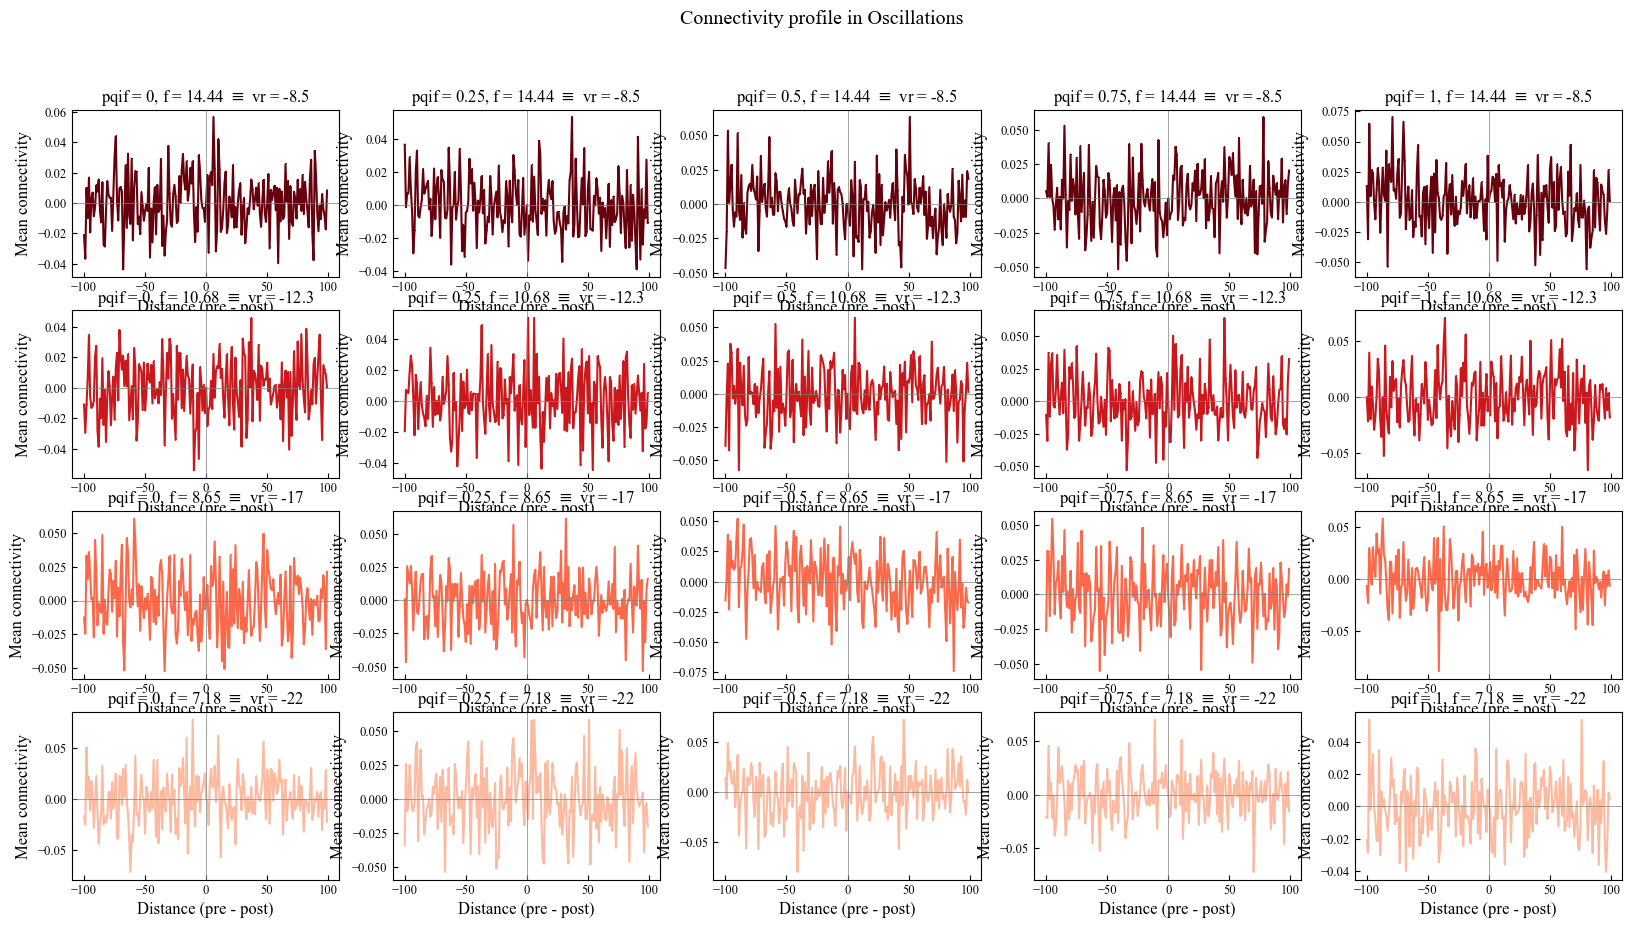

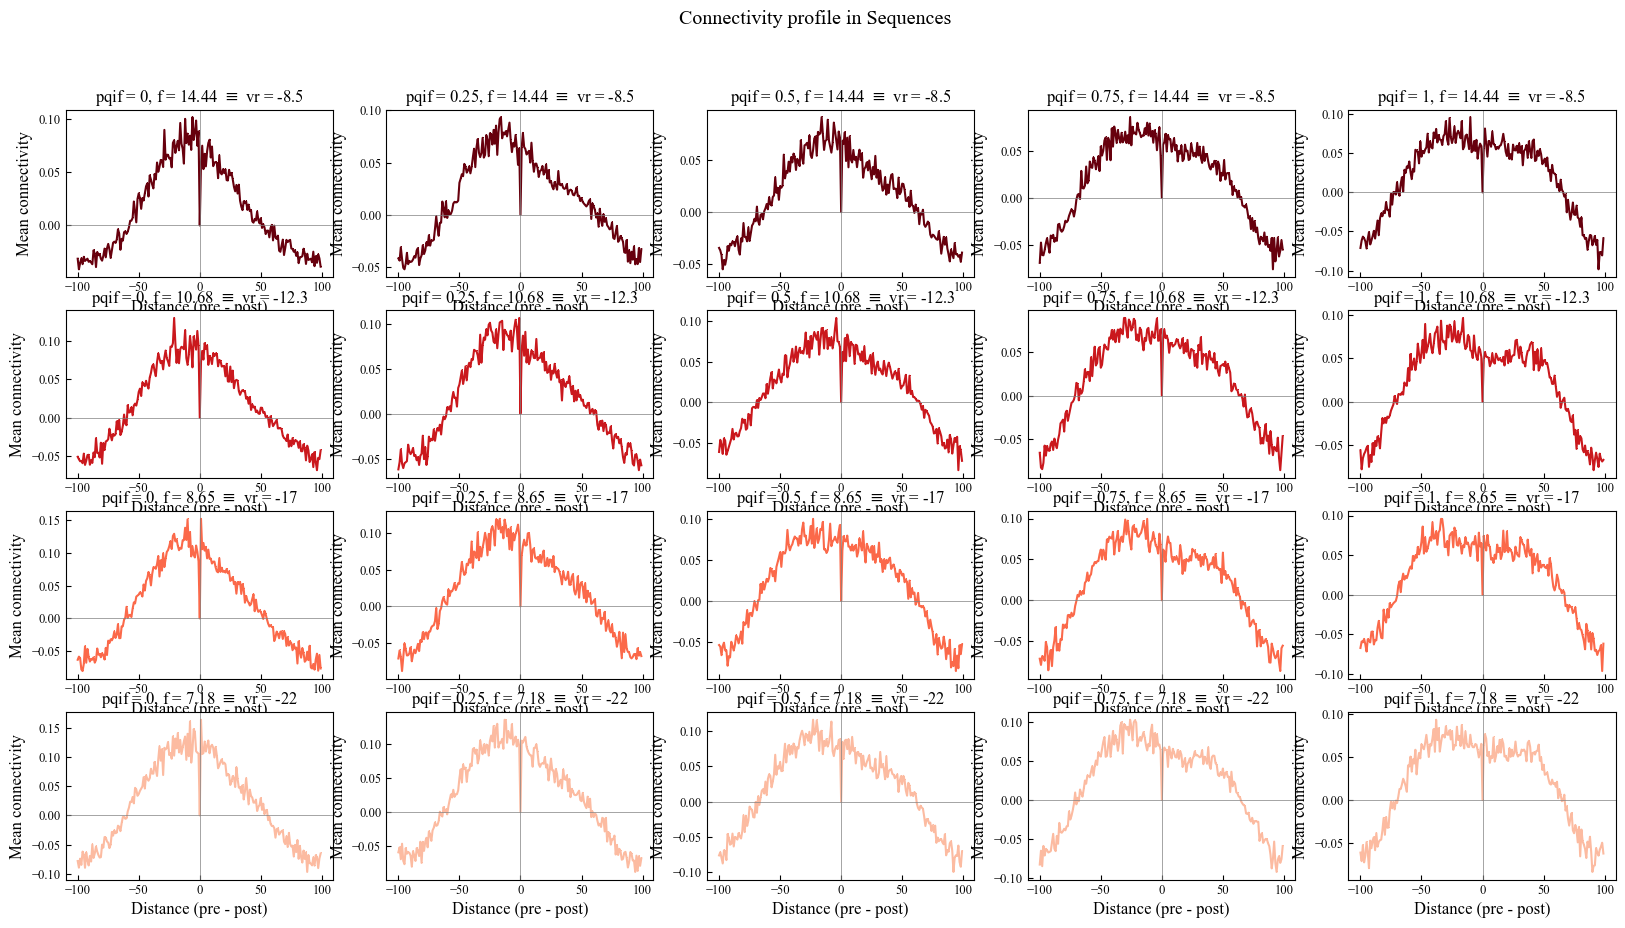

In [113]:
# weights_dict[simulation_id] = weights  # Dictionary mapping simulationID to weight array

import pandas as pd
import numpy as np
import matplotlib
import sys


########## Loop variables ##########
vrest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74
all_slopes = [14.44, 10.68, 10.74, 8.65, 7.18]

pqif_number = [0, 0.25, 0.5, 0.75, 1]
pqif_homogenous = [0, 1]
pqif_heterogenous = [0.25, 0.5, 0.75]

dynamics = ['oscillations', 'sequences']
# dynamics = ['oscillations']
seed_number = [i for i in range(0, 1)]

# for key in weights_dict:
#     print(key)

n_figures = len(dynamics)
n_rows = len(slope)
n_columns = len(pqif_number)

for dyn in dynamics:

    # Simulation number corresponding to dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()

    fig, axs = plt.subplots(n_rows, n_columns, figsize=(20, 10))
    fig.suptitle(f"Connectivity profile in {dyn.capitalize()}")

    for i, (sim, f, vr) in enumerate(zip(simulation_number, slope, vrest)):

        for j, pqif in enumerate(pqif_number):

            ax = axs[i, j]

            simulation_id = f'{dyn}_{sim}_{pqif}_{seed}'  # Shared across dataframe and dictionary

            # print(simulation_id)

            w = weights_dict[simulation_id]


            distances, column_mean = connectivity_profile_preprocessing(w)

            # plt.figure()
            ax.plot(distances, column_mean, marker=',', linestyle='-', markersize=1, color=color_map_vrest[vr])
            ax.set_xlabel("Distance (pre - post)")
            ax.set_ylabel("Mean connectivity")
            ax.set_title(f"pqif = {pqif}, f = {f} $\equiv$ vr = {vr}")
            ax.axhline(0, color='gray', linewidth=0.5)  # Where connectivity=0 is
            ax.axvline(0, color='gray', linewidth=0.5)  # Where distance=0 is
            # plt.tight_layout()
            # plt.savefig(os.path.join(subfolder_plots, "connectivity_profile.png"), dpi=300)
        # plt.suptitle(f"Connectivity profile")
    plt.show()

In [ ]:

    # Connectivity profile
plt.figure()
plt.plot(distances, column_mean, marker=',', linestyle='-', markersize=1)
plt.xlabel("Distance (pre - post)")
plt.ylabel("Mean connectivity")
plt.title("Connectivity profile")
plt.axhline(0, color='gray', linewidth=0.5)  # Where connectivity=0 is
plt.axvline(0, color='gray', linewidth=0.5)  # Where distance=0 is
plt.tight_layout()
plt.savefig(os.path.join(subfolder_plots, "connectivity_profile.png"), dpi=300)
plt.show()

# Firing rate


$S_{t,n}$ tells whether a neuron $n$ spikes in millisecond $t$, with $t=1,...,M$ and $n=1,...,N$. For a single neuron it is summed across time: $k_n=\sum_{t=1}^{M} S_{t,n}$. Firing rate is then given by $r_n = \frac{K_n}{T}$ where $T$ is seconds:

$$
    r_n = \frac{1}{T} \sum_{t=1}^{M} S_{t,n}.
$$

Because spikes are discrete, the smallest possible change in firing rate is $\Delta r_min = 1/T$, so for 5 seconds it is $0.2 Hz$


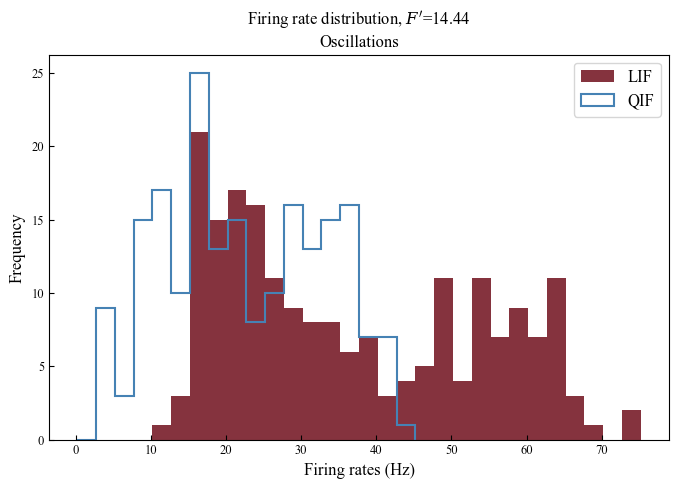

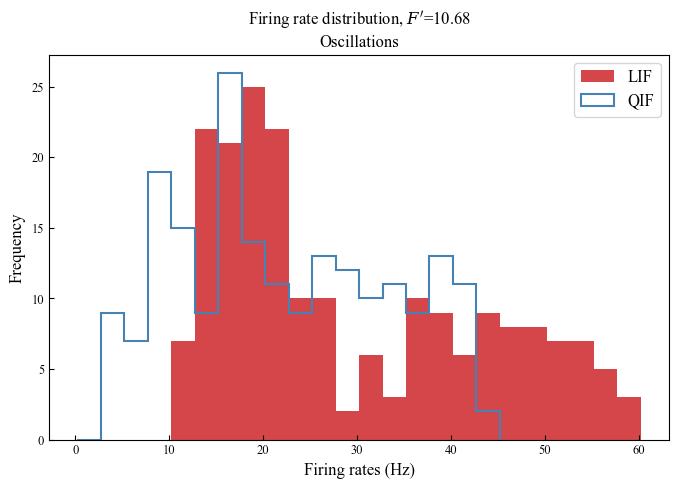

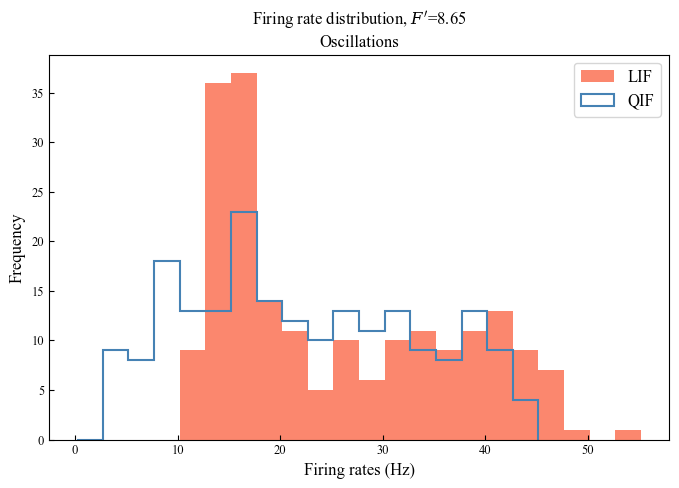

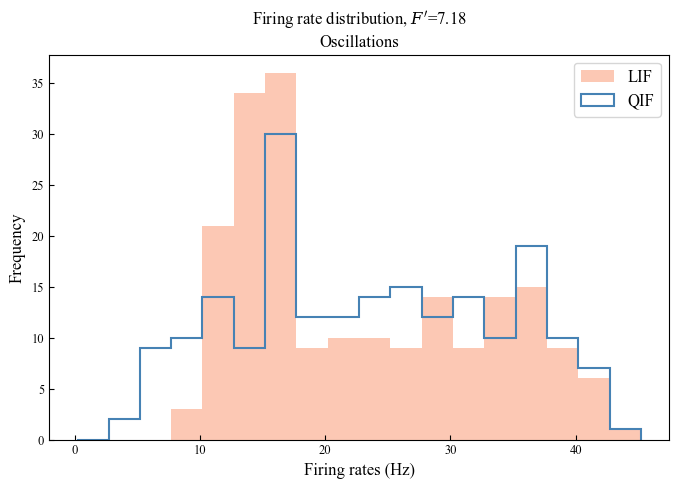

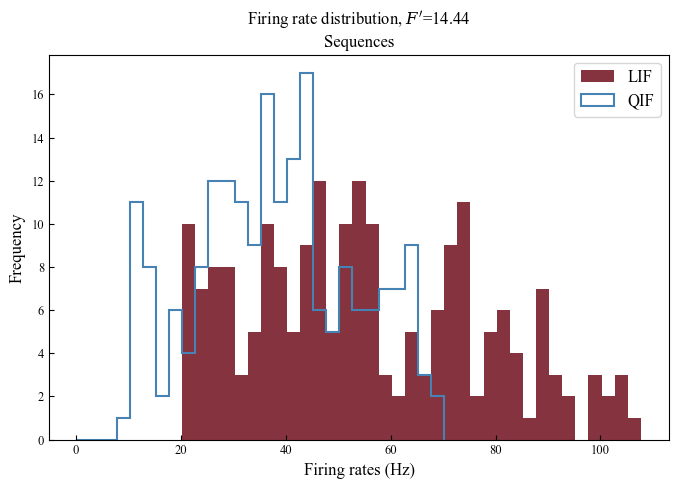

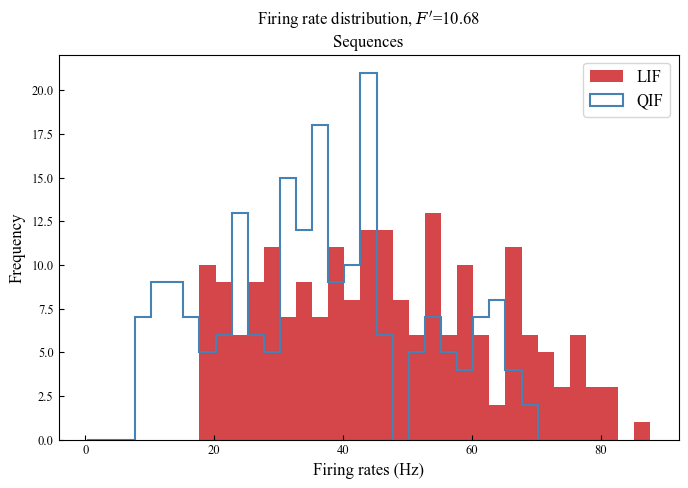

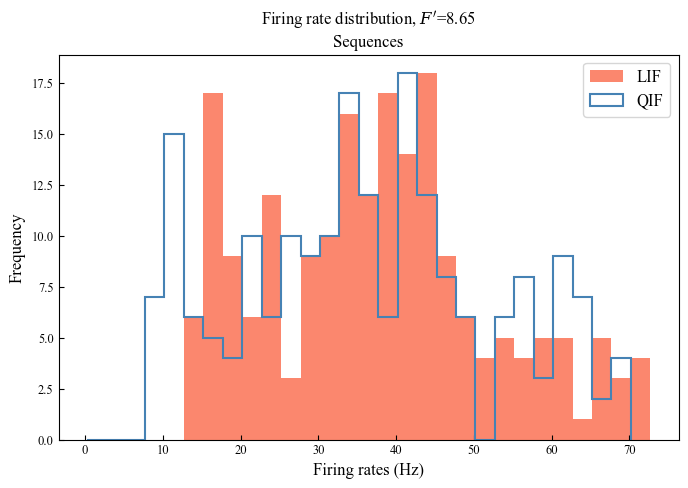

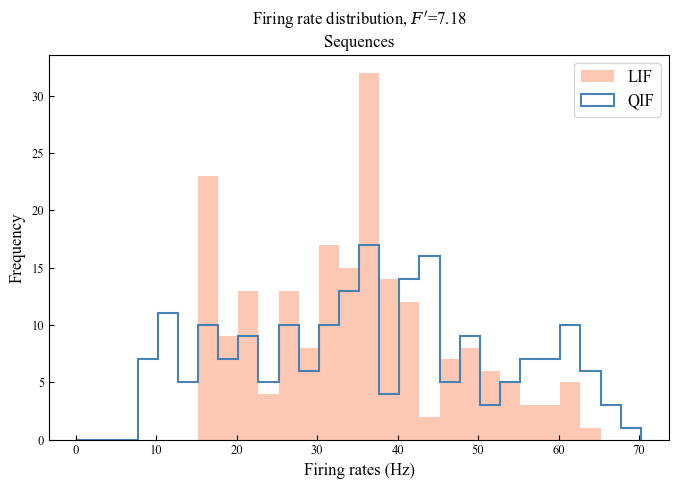

finished


In [29]:
# ========== Firing rate distributions ==========

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple
import matplotlib

from brokenaxes import brokenaxes
import sys

########## Initialization of lists of values needed ##########


# Simulation variables
simulation_number = [i for i in range(1, 5)]  # 1, 5 for osc;  9, 13 for seq
vr_number = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74

pqif_values = [0, 0.25, 0.5, 0.75, 1]
pqif_homogenous = [0, 1]
names_homogenous = ["LIF", "QIF"]
names = ["LIF", "MIX 0.25", "MIX 0.50", "MIX 0.75", "QIF"]

seed_number = [i for i in range(0, 1)]  # If only one seed, set to (0, 1)
dynamics = ['oscillations', 'sequences']
# dynamics = ['oscillations']


########## Time variables ##########
ms_per_file = 1000  # miliseconds
sec_after_learning = 5  # seconds after learning is from (inclusive) 11 to 16 (exclusive)
total_ms = ms_per_file * sec_after_learning  # 1000 * 5 = 5000 ms in total
T_seconds = total_ms / 1000  # To get in seconds so we get Hz


########## Make dataframe ##########

results = []  # Store all results
dicts = []  # store all dicts

for dyn in dynamics:

    #### Correct simulaton numbers from dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()


    for seed in seed_number:
        for sim, vr, f in zip(simulation_number, vr_number, slope):
            fig, axs = plt.subplots(figsize=(8,5))
            ax = axs
            for pq, name in zip(pqif_homogenous, names_homogenous):


                # Formatting
                if pq == 0:
                    histtype='bar'
                    color = color_map_vrest[vr]
                    linestyle=''
                    linewidth=''

                elif pq == 1:
                    #do something
                    histtype='step'
                    color='steelblue'
                else:
                    print("Only use homogenous networks here")
                    sys.exit

                linestyle='-'
                linewidth=1.5

                kwargs = {
                    "histtype": histtype,
                    "color": color
                }

                if histtype == 'step':
                    kwargs["linestyle"] = linestyle
                    kwargs["linewidth"] = linewidth
                else:
                    kwargs["alpha"] = 0.8

                try:

                    spike_blocks = [np.loadtxt(f'{dyn}\simulation_{sim}\simulation_{sim}_nspikes\simulation_{sim}_nspikes_pqif_{pq}_iloop_{i}_seed_0.csv', delimiter=',') for i in range(11, 16)]  # load all nspikes files after learning, 11-16
                    spikes_all = np.vstack(spike_blocks)  # Stack them: Gives shape (5000, 200) i.e. the full 5 seconds for all 200 neurons

                except FileNotFoundError:  # In case there are missing files, let the program still plot for the rest, but notify
                    print(f"File not found: {sim}: {pq}, will be skipped.")
                    continue  # Go to next iteration


                # Convert the numpy array containing all spikes into a dataframe 

                spikes_df = pd.DataFrame(spikes_all)

                # Print and display just to confirm how it looks
                # print(f"Pqif {pq} vr: {vr}")
                # display(spikes_df)

                ########## Firing rate for neuron i: Sum across column i (that neuron's spikes over 5 sec), divide by total time ##########

                spike_counts = spikes_df.sum(axis=0)  # returns a Pandas series indexed by column number containing spike sum for neuron i

                spikes_per_neuron = spike_counts.values  # numpy array shape (neurons, )

                firing_rate_hz = spikes_per_neuron / T_seconds  # elementwise division, gives each neurons firing rate

                ########## Figure ##########
                bin_width = 2.5  # Hz
                bins = np.arange(0.2, firing_rate_hz.max() + bin_width, bin_width)

                ax.hist(firing_rate_hz, bins=bins, log=False, density=False, label=name, **kwargs)   # Normalize with density?
                ax.set_title(f"Firing rate distribution, $F'$={f}\n{dyn.capitalize()}")
                ax.set_xlabel("Firing rates (Hz)")
                # ax.set_xlim(-6, 6)
                # ax.set_xticks(xticks)
                # ax.axvline(0, color='black', linestyle='--', linewidth=1)
                ax.set_ylabel("Frequency")
                ax.legend()

        plt.show()


print("finished")

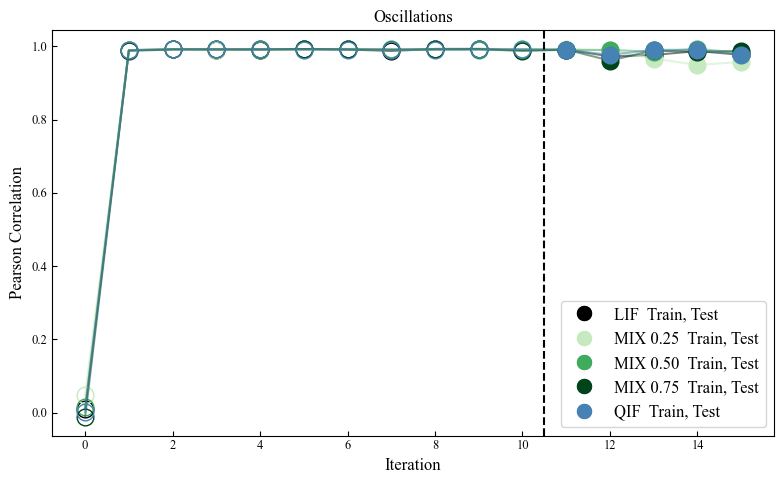

In [ ]:
# ========== Correlation, Oscillations (NOT BROKEN AXIS) ==========

# Imports
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from brokenaxes import brokenaxes

########## Initializations ##########


# Simulation variables
simulation_number = [i for i in range(1,5)]  # or 9, 13 if sequences
vr_number = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
pqif_values = [0, 0.25, 0.5, 0.75, 1]
names = ["LIF", "MIX 0.25", "MIX 0.50", "MIX 0.75", "QIF"]
seed_number = [i for i in range(0, 5)]  # If only one seed, set to (0, 1)

# Parameters used during oscillation
N = 200
pq = 0
idx = 1
itmax = 1000
itstim = 200 
nloop = 16



# Create figure
fig, ax = plt.subplots(figsize=(8,5))

for pq, nombre in zip(pqif_values, names):
    # Formatting
    color = color_map_pqif[pq]
    cc = np.zeros(nloop)  # Initialize array
    cc_std = np.zeros(nloop)  # Initialize array for std

    for iloop in range(nloop):
        # Load target
        target_csv = pd.read_csv(f'oscillations/simulation_{idx}/simulation_{idx}_targets_{pq}.csv')
        targets = target_csv.values

        file = f'oscillations/simulation_{idx}/simulation_{idx}_inputs/simulation_{idx}_inputs_pqif_{pq}_iloop_{iloop}_seed_0.csv'  # load input
        df = pd.read_csv(file, header=None).values
        ci = np.zeros(N)
        for i in range(N):
            rout_i = df[:, i]
            if np.var(targets[itstim:, i]) > 0 and np.var(rout_i[itstim:]) > 0:  # If variance above 0
                ci[i] = pearsonr(targets[itstim:, i], rout_i[itstim:])[0]  # Pearson R of target and input
        cc[iloop] = np.mean(ci)
        cc_std[iloop] = np.std(ci)

    # Plot curves and markers
    ax.plot(np.arange(nloop), cc, color=color, alpha=0.5)
    ax.plot(np.arange(1, 11), cc[1:11], 'o', markersize=12, color=color, markerfacecolor='none')
    ax.plot(np.arange(11, 16), cc[11:], 'o', markersize=12, color=color, markerfacecolor=color)
    ax.plot(0, cc[0], 'o', color=color, markersize=12, markerfacecolor='none')

# Labels and scales
ax.set_title('Oscillations')
ax.axvline(10.5, color='black', linestyle="--")
ax.set_xlabel('Iteration')
ax.set_ylabel('Pearson Correlation')

# Optional: custom legend
legend_elements = []
labels = []
for nombre, pq in zip(names, pqif_values):
    color = color_map_pqif[pq]
    train_marker = Line2D([0], [0], marker='o', color=color, markerfacecolor='none',
                          markersize=10, linestyle='None')
    test_marker = Line2D([0], [0], marker='o', color=color, markerfacecolor=color,
                         markersize=10, linestyle='None')
    legend_elements.append((train_marker, test_marker))
    labels.append(f"{nombre}  Train, Test")

ax.legend(legend_elements, labels, handler_map={tuple: HandlerTuple()}, loc='lower right')

plt.tight_layout()

plt.show()

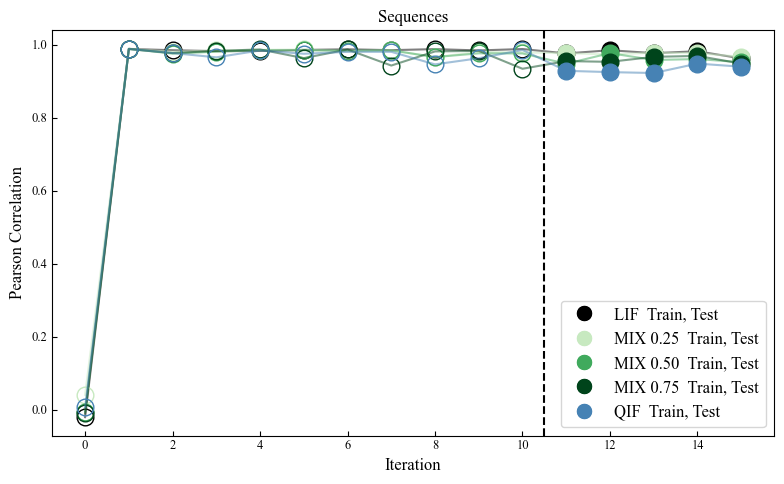

In [ ]:
# ========== Correlation, Sequences (NOT BROKEN AXIS) ==========

# Imports
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from brokenaxes import brokenaxes

########## Initializations ##########


# Simulation variables
simulation_number = [i for i in range(9,13)]  # or 9, 13 if sequences
vr_number = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
pqif_values = [0, 0.25, 0.5, 0.75, 1]
names = ["LIF", "MIX 0.25", "MIX 0.50", "MIX 0.75", "QIF"]
seed_number = [i for i in range(0, 5)]  # If only one seed, set to (0, 1)

# Parameters used during oscillation
N = 200
pq = 0
idx = 9
itmax = 1000
itstim = 200 
nloop = 16



# Create figure
fig, ax = plt.subplots(figsize=(8,5))

for pq, nombre in zip(pqif_values, names):
    # Formatting
    color = color_map_pqif[pq]
    cc = np.zeros(nloop)  # Initialize array
    cc_std = np.zeros(nloop)  # Initialize array for std

    for iloop in range(nloop):
        # Load target
        target_csv = pd.read_csv(f'sequences/simulation_{idx}/simulacion_{idx}_targets_{pq}.csv')
        targets = target_csv.values

        file = f'sequences/simulation_{idx}/simulation_{idx}_inputs/simulation_{idx}_inputs_pqif_{pq}_iloop_{iloop}_seed_0.csv'  # load input
        df = pd.read_csv(file, header=None).values
        ci = np.zeros(N)
        for i in range(N):
            rout_i = df[:, i]
            if np.var(targets[itstim:, i]) > 0 and np.var(rout_i[itstim:]) > 0:  # If variance above 0
                ci[i] = pearsonr(targets[itstim:, i], rout_i[itstim:])[0]  # Pearson R of target and input
        cc[iloop] = np.mean(ci)
        cc_std[iloop] = np.std(ci)

    # Plot curves and markers
    ax.plot(np.arange(nloop), cc, color=color, alpha=0.5)
    ax.plot(np.arange(1, 11), cc[1:11], 'o', markersize=12, color=color, markerfacecolor='none')
    ax.plot(np.arange(11, 16), cc[11:], 'o', markersize=12, color=color, markerfacecolor=color)
    ax.plot(0, cc[0], 'o', color=color, markersize=12, markerfacecolor='none')

# Labels and scales
ax.set_title('Sequences')
ax.axvline(10.5, color='black', linestyle="--")
ax.set_xlabel('Iteration')
ax.set_ylabel('Pearson Correlation')

# Optional: custom legend
legend_elements = []
labels = []
for nombre, pq in zip(names, pqif_values):
    color = color_map_pqif[pq]
    train_marker = Line2D([0], [0], marker='o', color=color, markerfacecolor='none',
                          markersize=10, linestyle='None')
    test_marker = Line2D([0], [0], marker='o', color=color, markerfacecolor=color,
                         markersize=10, linestyle='None')
    legend_elements.append((train_marker, test_marker))
    labels.append(f"{nombre}  Train, Test")

ax.legend(legend_elements, labels, handler_map={tuple: HandlerTuple()}, loc='lower right')

plt.tight_layout()

plt.show()

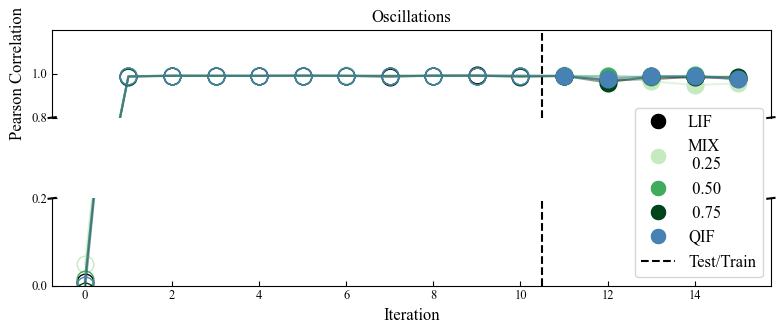

In [90]:
# ========== Correlation WITH BROKEN AXIS ==========

# Imports
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from brokenaxes import brokenaxes

########## Initializations ##########


# Simulation variables
simulation_number = [i for i in range(9,13)]  # or 9, 13 if sequences
vr_number = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
pqif_values = [0, 0.25, 0.5, 0.75, 1]
names = ["LIF", f"MIX\n 0.25", " 0.50", " 0.75", "QIF"]
seed_number = [i for i in range(0, 5)]  # If only one seed, set to (0, 1)

# Parameters used during oscillation
N = 200
pq = 0
idx = 1
itmax = 1000
itstim = 200 
nloop = 16

yticks_top = [0.80, 1]
yticks_bottom = [0, 0.2]


# Create figure
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1, sharex=True, figsize=(8,3.5)
    )

for pq, nombre in zip(pqif_values, names):
    # Formatting
    color = color_map_pqif[pq]
    cc = np.zeros(nloop)  # Initialize array
    cc_std = np.zeros(nloop)  # Initialize array for std

    for iloop in range(nloop):
        # Load target
        target_csv = pd.read_csv(f'oscillations/simulation_{idx}/simulation_{idx}_targets_{pq}.csv')
        targets = target_csv.values

        file = f'oscillations/simulation_{idx}/simulation_{idx}_inputs/simulation_{idx}_inputs_pqif_{pq}_iloop_{iloop}_seed_0.csv'  # load input
        df = pd.read_csv(file, header=None).values
        ci = np.zeros(N)
        for i in range(N):
            rout_i = df[:, i]
            if np.var(targets[itstim:, i]) > 0 and np.var(rout_i[itstim:]) > 0:  # If variance above 0
                ci[i] = pearsonr(targets[itstim:, i], rout_i[itstim:])[0]  # Pearson R of target and input
        cc[iloop] = np.mean(ci)
        cc_std[iloop] = np.std(ci)

    # Plot curves and markers ON BOTH AXES
    ax_top.plot(np.arange(nloop), cc, color=color, alpha=0.5)
    ax_top.plot(np.arange(1, 11), cc[1:11], 'o', markersize=12, color=color, markerfacecolor='none')
    ax_top.plot(np.arange(11, 16), cc[11:], 'o', markersize=12, color=color, markerfacecolor=color)
    ax_top.plot(0, cc[0], 'o', color=color, markersize=12, markerfacecolor='none')

    ax_bottom.plot(np.arange(nloop), cc, color=color, alpha=0.5)
    ax_bottom.plot(np.arange(1, 11), cc[1:11], 'o', markersize=12, color=color, markerfacecolor='none')
    ax_bottom.plot(np.arange(11, 16), cc[11:], 'o', markersize=12, color=color, markerfacecolor=color)
    ax_bottom.plot(0, cc[0], 'o', color=color, markersize=12, markerfacecolor='none')

# Break y axis
ax_top.set_ylim(0.80, 1.2)  # Upper range
ax_bottom.set_ylim(0, 0.2)  # Lower range

ax_top.set_yticks(yticks_top)
ax_bottom.set_yticks(yticks_bottom)

# Hide spines between axes

ax_top.spines['bottom'].set_visible(False)
ax_bottom.spines['top'].set_visible(False)

# Disable ticks where break is
ax_top.tick_params(labeltop=False, bottom=False),
ax_bottom.tick_params(top=False)

# Diagonal break marks
d = 0.005 # size of diagonal lines in axes coordinate
kwargs = dict(transform=ax_top.transAxes, color='k', clip_on=False)
ax_top.plot((-d, +d), (-d, +d), **kwargs)
ax_top.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax_bottom.transAxes)
ax_bottom.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax_bottom.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# Labels and scales
ax_top.set_title('Oscillations')
ax_top.axvline(10.5, color='black', linestyle="--")
ax_bottom.axvline(10.5, color='black', linestyle="--")
ax_bottom.set_xlabel('Iteration')
ax_top.set_ylabel('Pearson Correlation')

# Optional: custom legend
legend_elements = []
labels = []
for nombre, pq in zip(names, pqif_values):
    color = color_map_pqif[pq]
    train_marker = Line2D([0], [0], marker='o', color=color, markerfacecolor='none',
                          markersize=10, linestyle='None')
    test_marker = Line2D([0], [0], marker='o', color=color, markerfacecolor=color,
                         markersize=10, linestyle='None')
    legend_elements.append((train_marker, test_marker))
    labels.append(f"{nombre}")

vertical_line = Line2D([0], [0], color='black', linestyle='--')
legend_elements.append(vertical_line)
labels.append(f"Test/Train")

ax_bottom.legend(legend_elements, labels, handler_map={tuple: HandlerTuple()}, loc='lower right')

plt.tight_layout()

plt.show()

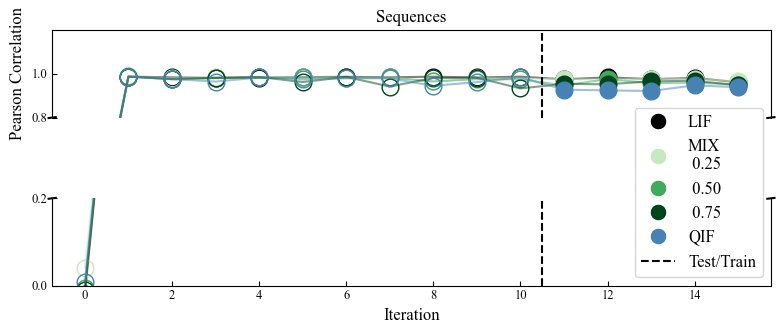

In [88]:
# ========== Correlation WITH BROKEN AXIS ==========

# Imports
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from brokenaxes import brokenaxes

########## Initializations ##########


# Simulation variables
simulation_number = [i for i in range(9,13)]  # or 9, 13 if sequences
vr_number = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
pqif_values = [0, 0.25, 0.5, 0.75, 1]
names = ["LIF", f"MIX\n 0.25", " 0.50", " 0.75", "QIF"]
seed_number = [i for i in range(0, 5)]  # If only one seed, set to (0, 1)

# Parameters used during oscillation
N = 200
pq = 0
idx = 9
itmax = 1000
itstim = 200 
nloop = 16

yticks_top = [0.80, 1]
yticks_bottom = [0, 0.2]


# Create figure
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1, sharex=True, figsize=(8,3.5)
    )

for pq, nombre in zip(pqif_values, names):
    # Formatting
    color = color_map_pqif[pq]
    cc = np.zeros(nloop)  # Initialize array
    cc_std = np.zeros(nloop)  # Initialize array for std

    for iloop in range(nloop):
        # Load target
        target_csv = pd.read_csv(f'sequences/simulation_{idx}/simulacion_{idx}_targets_{pq}.csv')
        targets = target_csv.values

        file = f'sequences/simulation_{idx}/simulation_{idx}_inputs/simulation_{idx}_inputs_pqif_{pq}_iloop_{iloop}_seed_0.csv'  # load input
        df = pd.read_csv(file, header=None).values
        ci = np.zeros(N)
        for i in range(N):
            rout_i = df[:, i]
            if np.var(targets[itstim:, i]) > 0 and np.var(rout_i[itstim:]) > 0:  # If variance above 0
                ci[i] = pearsonr(targets[itstim:, i], rout_i[itstim:])[0]  # Pearson R of target and input
        cc[iloop] = np.mean(ci)
        cc_std[iloop] = np.std(ci)

    # Plot curves and markers ON BOTH AXES
    ax_top.plot(np.arange(nloop), cc, color=color, alpha=0.5)
    ax_top.plot(np.arange(1, 11), cc[1:11], 'o', markersize=12, color=color, markerfacecolor='none')
    ax_top.plot(np.arange(11, 16), cc[11:], 'o', markersize=12, color=color, markerfacecolor=color)
    ax_top.plot(0, cc[0], 'o', color=color, markersize=12, markerfacecolor='none')

    ax_bottom.plot(np.arange(nloop), cc, color=color, alpha=0.5)
    ax_bottom.plot(np.arange(1, 11), cc[1:11], 'o', markersize=12, color=color, markerfacecolor='none')
    ax_bottom.plot(np.arange(11, 16), cc[11:], 'o', markersize=12, color=color, markerfacecolor=color)
    ax_bottom.plot(0, cc[0], 'o', color=color, markersize=12, markerfacecolor='none')

# Break y axis
ax_top.set_ylim(0.80, 1.2)  # Upper range
ax_bottom.set_ylim(0, 0.2)  # Lower range

ax_top.set_yticks(yticks_top)
ax_bottom.set_yticks(yticks_bottom)

# Hide spines between axes

ax_top.spines['bottom'].set_visible(False)
ax_bottom.spines['top'].set_visible(False)

# Disable ticks where break is
ax_top.tick_params(labeltop=False, bottom=False),
ax_bottom.tick_params(top=False)

# Diagonal break marks
d = 0.005 # size of diagonal lines in axes coordinate
kwargs = dict(transform=ax_top.transAxes, color='k', clip_on=False)
ax_top.plot((-d, +d), (-d, +d), **kwargs)
ax_top.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax_bottom.transAxes)
ax_bottom.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax_bottom.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# Labels and scales
ax_top.set_title('Sequences')
ax_top.axvline(10.5, color='black', linestyle="--")
ax_bottom.axvline(10.5, color='black', linestyle="--")
ax_bottom.set_xlabel('Iteration')
ax_top.set_ylabel('Pearson Correlation')

# Optional: custom legend
legend_elements = []
labels = []
for nombre, pq in zip(names, pqif_values):
    color = color_map_pqif[pq]
    train_marker = Line2D([0], [0], marker='o', color=color, markerfacecolor='none',
                          markersize=10, linestyle='None')
    test_marker = Line2D([0], [0], marker='o', color=color, markerfacecolor=color,
                         markersize=10, linestyle='None')
    legend_elements.append((train_marker, test_marker))
    labels.append(f"{nombre}")

vertical_line = Line2D([0], [0], color='black', linestyle='--')
legend_elements.append(vertical_line)
labels.append(f"Test/Train")

ax_bottom.legend(legend_elements, labels, handler_map={tuple: HandlerTuple()}, loc='lower right')

plt.tight_layout()

plt.show()

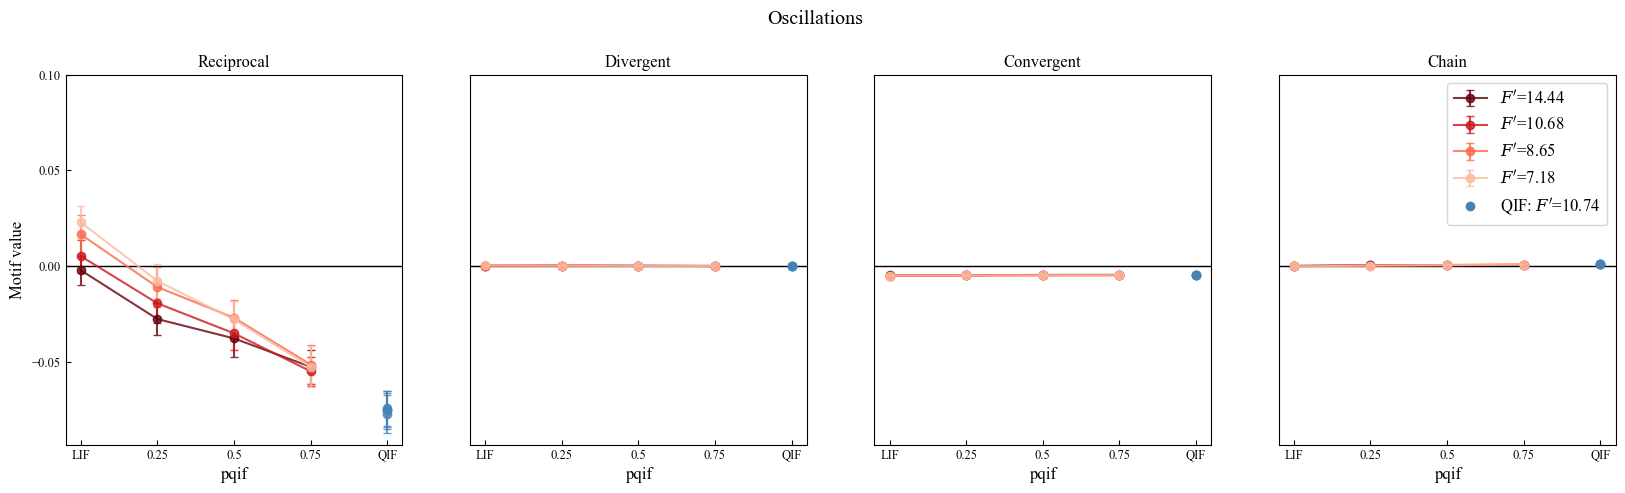

In [30]:
### This is the formatted version of across seeds

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D

pqif_values = [0, 0.25, 0.5, 0.75]
pure_qif = [1]
xnames = ['LIF', '0.25', '0.5', '0.75', 'QIF']
yticks = [-0.05, 0.00, 0.05, 0.10]

motifs = ["tau_rec", "tau_div", "tau_con", "tau_chn"]
motif_labels = {
    "tau_rec": "Reciprocal",
    "tau_div": "Divergent",
    "tau_con": "Convergent",
    "tau_chn": "Chain"
}

dynamics = ["oscillations", "sequences"]

simulations_osc = [1, 2, 3, 4]
simulations_seq = [9, 10, 11, 12]
# v_rest = [-22, -17, -12.3, -8.5]
v_rest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74

# colors_osc = ['lightblue', 'skyblue', 'dodgerblue', 'steelblue', 'navy']
# colors_seq = ['lightgreen', 'mediumseagreen', 'seagreen', 'forestgreen', 'darkgreen']

colors_osc = ['lightblue', 'skyblue', 'dodgerblue', 'steelblue']
colors_seq = ['lightgreen', 'mediumseagreen', 'seagreen', 'forestgreen']


df_oscillation = []
df_sequences = []

fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

labeled = {"oscillations": False, "sequences": False}


for sim1, sim2, vrest, f, col1, col2 in zip(simulations_osc, simulations_seq, v_rest, slope, colors_osc, colors_seq):
# for sim1, sim2, col in zip(simulations_osc, simulations_seq, color_map):
    # First we take out correct dataframe


    for i, motif in enumerate(motifs):
        # Make axes objects for the figure, as many as there are motifs
        ax = axs[i]


        df_results = pd.read_csv(f'oscillations\simulation_{sim1}\simulation_{sim1}_results.csv')  # Current dataframe based on dynamics and simulation (vrest/slope)
        
        # color = col1
        color = color_map_vrest[vrest]
        sim = sim1
        line = '-'
        markerfacecolor = color

        edge = 'none'
        face = 'steelblue'

        osc_seeds = df_results['seed'].nunique()


        # Filter out correct nloop and divide pure QIF from the rest
        df_filtered = df_results[(df_results['nloop'] == 15) & (df_results['pqif'] != 1)]
        df_filtered_qif = df_results[(df_results['nloop'] == 15) & (df_results['pqif'] == 1)]

        #  Group into buckets: Current motif across the pqif values
        grp = df_filtered.groupby("pqif")[motif]  # e.g.: reciprocal motif across pqif 0-0.75, for n seeds
        grp2 = df_filtered_qif.groupby("pqif")[motif] # same across QIF only, for n seeds


        # Calculate mean and standard deviation of y values in current motif
        # LIF-MIX
        y_mean = grp.mean()  # Mean across seeds for the motif values
        y_std = grp.std(ddof=1)  # SD across seeds for the motif values
        # QIF
        y_mean_qif = grp2.mean()
        y_std_qif = grp2.std(ddof=1)

        # Make into numpy arrays for plotting
        p_vals = y_mean.index.to_numpy()
        y_vals = y_mean.to_numpy()
        y_err = y_std.to_numpy()

        p_vals2 = y_mean_qif.index.to_numpy()
        y_vals2 = y_mean_qif.to_numpy()
        y_err2 = y_std_qif.to_numpy()



        # here we plot all pqif and corresponding current motif (e.g. reciprocal)
        ax.errorbar(
            p_vals, y_vals, yerr=y_err, fmt='o', capsize=3, color=color, markerfacecolor=markerfacecolor, linestyle=line, alpha=0.8, label=f"$F'$={f}",
        )

        ax.errorbar(
            p_vals2, y_vals2, yerr=y_err2, fmt='o', capsize=3, color='steelblue', markeredgecolor='steelblue', markerfacecolor=face, alpha=0.8,
        )

        ax.set_title(f"{motif_labels[motif]}")
        # ax.label(dyn)
        ax.set_xlabel('pqif')
        ax.set_ylabel('Motif value')
        # ax.set_ylim(-0.05, 0.10)
        ax.set_yticks(yticks)
        ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
        ax.set_xticklabels(xnames)
        ax.axhline(0, color='black', linewidth=0.8)


example_color = color_map_vrest[-8.5]

qif_label = plt.Line2D([0], [0], color="steelblue", marker='o', linestyle="None")
handles, labels = ax.get_legend_handles_labels()
handles.append(qif_label)
labels.append(f"QIF: $F'$={slope_qif}")

# legend_handles = [
#     Line2D([0], [0], color=example_color, linestyle='-', label='Oscillations'),
#     # Line2D([0], [0], color=example_color, linestyle='--', label='Sequences'),
#     Line2D([0], [0], color='steelblue', marker='o', linestyle='None', label='QIF (oscillations)'),
#     Line2D([0], [0], color='steelblue', marker='o', markerfacecolor='none', linestyle='None', label='QIF (sequences)')
# ]

for ax in axs[1:]:
    ax.yaxis.set_visible(False)

# plt.text(0.4, 0.8, f"Test text box", horizontalalignment='center')
# plt.tight_layout(rect=[0, 0, 1, 0.9])
# ax.legend(handles=legend_handles, frameon=True)
# plt.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(0.98, 0.5))
plt.legend(handles, labels)
plt.suptitle("Oscillations")
plt.subplots_adjust(top=0.85)
plt.show()





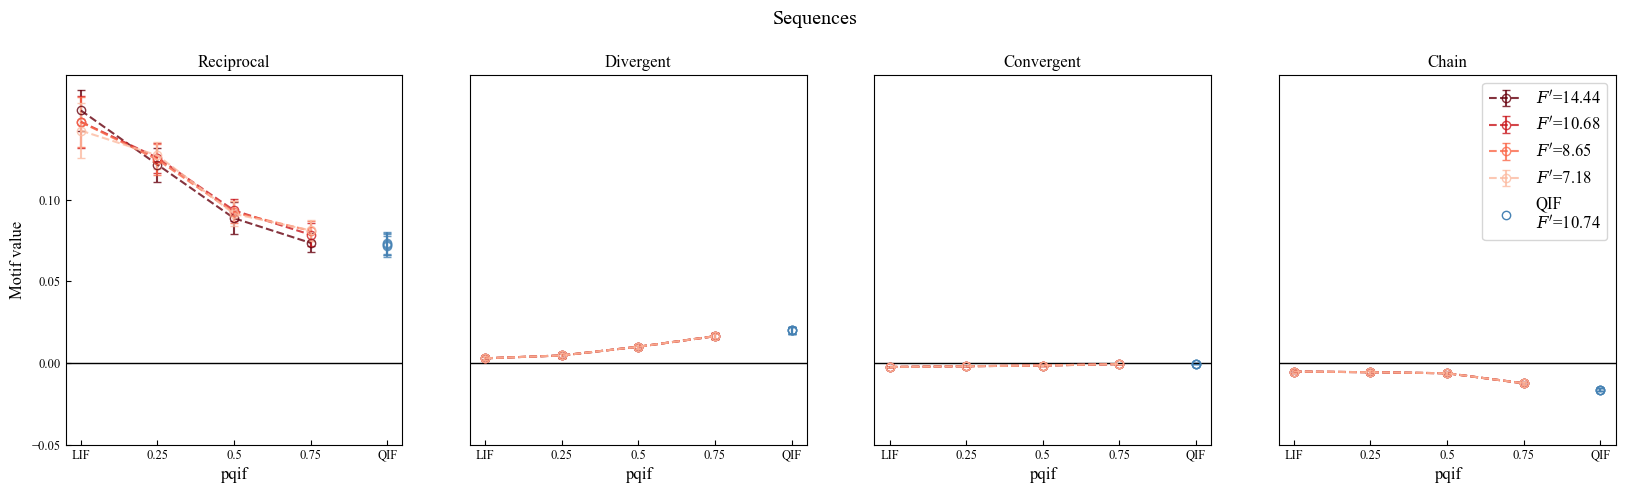

In [31]:
### Connectivity motifs sequences

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D

pqif_values = [0, 0.25, 0.5, 0.75]
pure_qif = [1]
xnames = ['LIF', '0.25', '0.5', '0.75', 'QIF']
yticks = [-0.05, 0.00, 0.05, 0.10]

motifs = ["tau_rec", "tau_div", "tau_con", "tau_chn"]
motif_labels = {
    "tau_rec": "Reciprocal",
    "tau_div": "Divergent",
    "tau_con": "Convergent",
    "tau_chn": "Chain"
}

dynamics = ["oscillations", "sequences"]

simulations_osc = [1, 2, 3, 4]
simulations_seq = [9, 10, 11, 12]
# v_rest = [-22, -17, -12.3, -8.5]
v_rest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74

# colors_osc = ['lightblue', 'skyblue', 'dodgerblue', 'steelblue', 'navy']
# colors_seq = ['lightgreen', 'mediumseagreen', 'seagreen', 'forestgreen', 'darkgreen']

colors_osc = ['lightblue', 'skyblue', 'dodgerblue', 'steelblue']
colors_seq = ['lightgreen', 'mediumseagreen', 'seagreen', 'forestgreen']


df_oscillation = []
df_sequences = []

fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

labeled = {"oscillations": False, "sequences": False}
labeled = True

for sim, vrest, f, col1, col2 in zip(simulations_seq, v_rest, slope, colors_osc, colors_seq):
# for sim1, sim2, col in zip(simulations_osc, simulations_seq, color_map):
    # First we take out correct dataframe


    for i, motif in enumerate(motifs):
        # Make axes objects for the figure, as many as there are motifs
        ax = axs[i]

        df_results = pd.read_csv(f'sequences\simulation_{sim}\simulation_{sim}_results.csv')

        # color = col2
        color = color_map_vrest[vrest]
        sim = sim2
        line = '--'
        markerfacecolor = 'none'

        edge = 'steelblue'
        face ='none'

        sec_seeds = df_results['seed'].nunique()


        # Filter out correct nloop and divide pure QIF from the rest
        df_filtered = df_results[(df_results['nloop'] == 15) & (df_results['pqif'] != 1)]
        df_filtered_qif = df_results[(df_results['nloop'] == 15) & (df_results['pqif'] == 1)]

        #  Group into buckets: Current motif across the pqif values
        grp = df_filtered.groupby("pqif")[motif]  # e.g.: reciprocal motif across pqif 0-0.75, for n seeds
        # print(grp.describe())
        grp2 = df_filtered_qif.groupby("pqif")[motif] # same across QIF only, for n seeds


        # Calculate mean and standard deviation of y values in current motif
        # LIF-MIX
        y_mean = grp.mean()  # Mean across seeds for the motif values
        y_std = grp.std(ddof=1)  # SD across seeds for the motif values
        # QIF
        y_mean_qif = grp2.mean()
        y_std_qif = grp2.std(ddof=1)

        # Make into numpy arrays for plotting
        p_vals = y_mean.index.to_numpy()
        y_vals = y_mean.to_numpy()
        y_err = y_std.to_numpy()

        p_vals2 = y_mean_qif.index.to_numpy()
        y_vals2 = y_mean_qif.to_numpy()
        y_err2 = y_std_qif.to_numpy()

        if sim == simulations_seq[0]:
            label = f"LIF\n$F'$={f}"
        else:
            label = f"$F'$={f}"

        # here we plot all pqif and corresponding current motif (e.g. reciprocal)
        ax.errorbar(
            p_vals, y_vals, yerr=y_err, fmt='o', capsize=3, color=color, markerfacecolor=markerfacecolor, linestyle=line, alpha=0.8, label=label,
        )


        ax.errorbar(
            p_vals2, y_vals2, yerr=y_err2, fmt='o', capsize=3, color='steelblue', markeredgecolor='steelblue', markerfacecolor=face, alpha=0.8,
        )

        labeled=False

        ax.set_title(f"{motif_labels[motif]}")
        # ax.label(dyn)
        ax.set_xlabel('pqif')
        ax.set_ylabel('Motif value')
        # ax.set_ylim(-0.05, 0.10)
        ax.set_yticks(yticks)
        ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
        ax.set_xticklabels(xnames)
        ax.axhline(0, color='black', linewidth=0.8)


example_color = color_map_vrest[-8.5]
qif_label = plt.Line2D([0], [0], color="steelblue", marker='o', markerfacecolor='none', linestyle="None")
handles, labels = ax.get_legend_handles_labels()
handles.append(qif_label)
labels.append(f"QIF\n$F'$={slope_qif}")


for ax in axs[1:]:
    ax.yaxis.set_visible(False)


plt.legend(handles, labels)

plt.suptitle("Sequences")
plt.subplots_adjust(top=0.85)
plt.show()





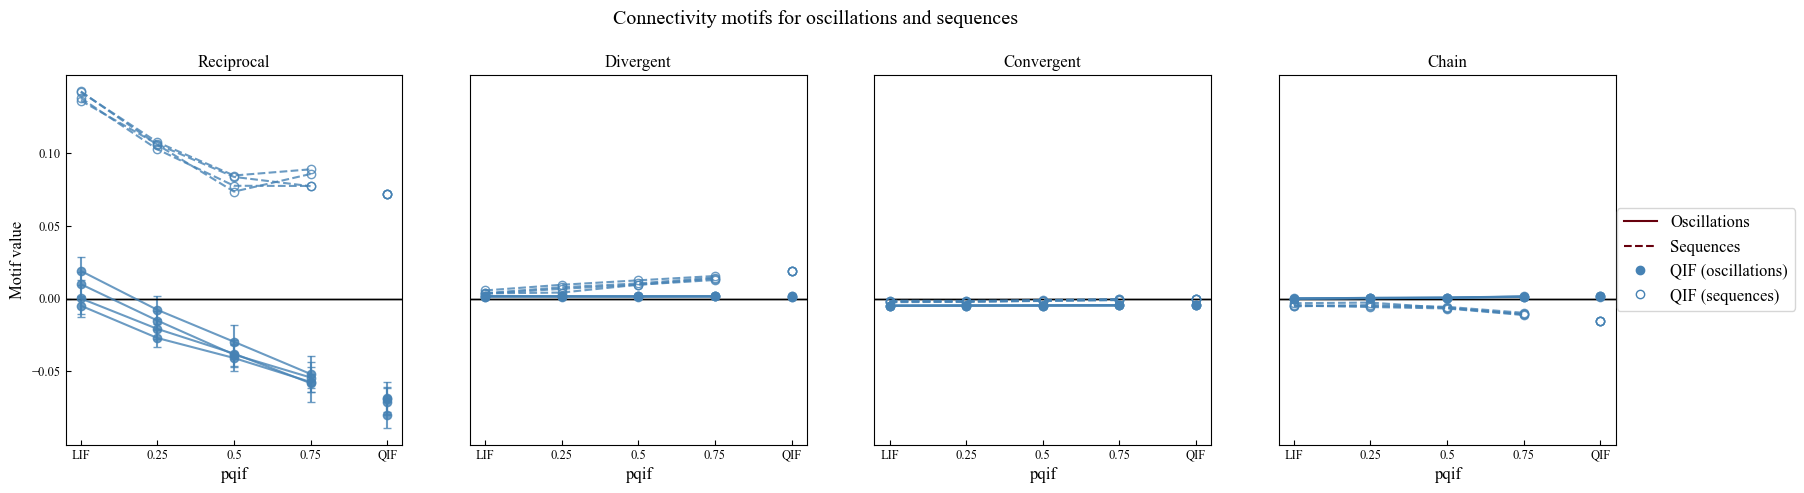

In [53]:
# ========== Connectivity motifs ==========
### This is the formatted version of across seeds

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D

pqif_values = [0, 0.25, 0.5, 0.75]
pure_qif = [1]
xnames = ['LIF', '0.25', '0.5', '0.75', 'QIF']
yticks = [-0.05, 0.00, 0.05, 0.10]

motifs = ["tau_rec", "tau_div", "tau_con", "tau_chn"]
motif_labels = {
    "tau_rec": "Reciprocal",
    "tau_div": "Divergent",
    "tau_con": "Convergent",
    "tau_chn": "Chain"
}

dynamics = ["oscillations", "sequences"]

simulations_osc = [1, 2, 3, 4]
simulations_seq = [9, 10, 11, 12]
# v_rest = [-22, -17, -12.3, -8.5]
v_rest = [-8.5, -12.3, -17, -22]

# colors_osc = ['lightblue', 'skyblue', 'dodgerblue', 'steelblue', 'navy']
# colors_seq = ['lightgreen', 'mediumseagreen', 'seagreen', 'forestgreen', 'darkgreen']

colors_osc = ['lightblue', 'skyblue', 'dodgerblue', 'steelblue']
colors_seq = ['lightgreen', 'mediumseagreen', 'seagreen', 'forestgreen']


df_oscillation = []
df_sequences = []

fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

labeled = {"oscillations": False, "sequences": False}

for dyn in dynamics:

    
    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()


    for sim, vrest in zip(simulation_number, v_rest):



        for i, motif in enumerate(motifs):
            # Make axes objects for the figure, as many as there are motifs
            ax = axs[i]

            df_results = pd.read_csv(f"{dyn}\simulation_{sim}\simulation_{sim}_results.csv")
            
            colors = color_map_vrest[vrest]

            if dyn == "oscillations":
                line = '-'
                markerfacecolor = color
                edge = 'none'
                face = 'steelblue'

            elif dyn == "sequences":
                line = '--'
                markerfacecolor = 'none'
                edge = 'steelblue'
                face ='none'
            
            # Filter out correct nloop and divide pure QIF from the rest
            df_filtered = df_results[(df_results['nloop'] == 15) & (df_results['pqif'] != 1)]
            df_filtered_qif = df_results[(df_results['nloop'] == 15) & (df_results['pqif'] == 1)]

            #  Group into buckets: Current motif across the pqif values
            grp = df_filtered.groupby("pqif")[motif]  # e.g.: reciprocal motif across pqif 0-0.75, for n seeds
            grp2 = df_filtered_qif.groupby("pqif")[motif] # same across QIF only, for n seeds


            # Calculate mean and standard deviation of y values in current motif
            # LIF-MIX
            y_mean = grp.mean()  # Mean across seeds for the motif values
            y_std = grp.std(ddof=1)  # SD across seeds for the motif values
            # QIF
            y_mean_qif = grp2.mean()
            y_std_qif = grp2.std(ddof=1)

            # Make into numpy arrays for plotting
            p_vals = y_mean.index.to_numpy()
            y_vals = y_mean.to_numpy()
            y_err = y_std.to_numpy()

            p_vals2 = y_mean_qif.index.to_numpy()
            y_vals2 = y_mean_qif.to_numpy()
            y_err2 = y_std_qif.to_numpy()



            # here we plot all pqif and corresponding current motif (e.g. reciprocal)
            ax.errorbar(
                p_vals, y_vals, yerr=y_err, fmt='o', capsize=3, color=color, markerfacecolor=markerfacecolor, linestyle=line, alpha=0.8,
            )

            ax.errorbar(
                p_vals2, y_vals2, yerr=y_err2, fmt='o', capsize=3, color='steelblue', markeredgecolor='steelblue', markerfacecolor=face, alpha=0.8,
            )

            ax.set_title(f"{motif_labels[motif]}")
            # ax.label(dyn)
            ax.set_xlabel('pqif')
            ax.set_ylabel('Motif value')
            # ax.set_ylim(-0.05, 0.10)
            ax.set_yticks(yticks)
            ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
            ax.set_xticklabels(xnames)
            ax.axhline(0, color='black', linewidth=0.8)


# example_color = make_color_map(-8.5)
example_color = color_map_vrest[-8.5]
legend_handles = [
    Line2D([0], [0], color=example_color, linestyle='-', label='Oscillations'),
    Line2D([0], [0], color=example_color, linestyle='--', label='Sequences'),
    Line2D([0], [0], color='steelblue', marker='o', linestyle='None', label='QIF (oscillations)'),
    Line2D([0], [0], color='steelblue', marker='o', markerfacecolor='none', linestyle='None', label='QIF (sequences)')
]

for ax in axs[1:]:
    ax.yaxis.set_visible(False)

# plt.text(0.4, 0.8, f"Test text box", horizontalalignment='center')
# plt.tight_layout(rect=[0, 0, 1, 0.9])
# ax.legend(handles=legend_handles, frameon=True)
plt.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(0.98, 0.5))

plt.suptitle("Connectivity motifs for oscillations and sequences")
plt.subplots_adjust(top=0.85)
plt.show()





# Test things

Text(0.5, 1.0, 'Simulated dynamics')

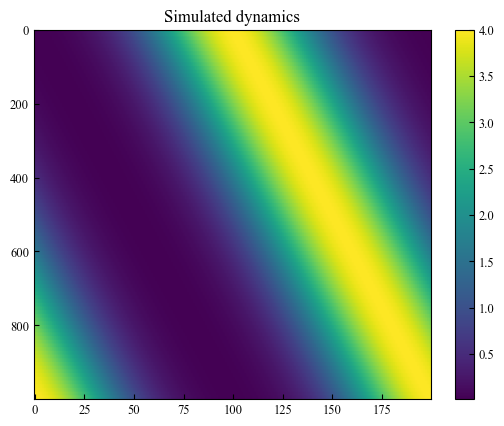

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import os

df = pd.read_csv('sequences\simulation_9\simulation_9_targets_0.csv')
# df = pd.read_csv('oscillations\simulation_1\simulation_1_targets_0.5.csv')


arr = df.to_numpy()

plt.ion()
plt.figure()
im_R = plt.imshow(arr, aspect='auto') # Autoscale,
plt.colorbar()
plt.title("Simulated dynamics")

In [95]:
import matplotlib
print(matplotlib.__version__)

3.10.5
